# Importing (Library & Data)

In [25]:
import pyiast
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pickle
import time
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt


df_NAME=pd.read_csv("HEAT_210701.csv")

bins_H2S = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_H2S.append(bin_tmp)
    f_tmp.close()
    
bins_CO2 = []
for nam in df_NAME["NAME"]:
    NAM=str(nam)
    f_tmp = open("iso_"+NAM+"_saved.bin",'rb')
    bin_tmp = pickle.load(f_tmp)
    bins_CO2.append(bin_tmp)
    f_tmp.close()

Names_CO2=df_NAME["NAME"].to_numpy()
Name_list=Names_CO2
Names_H2S=df_NAME["NAME"].to_numpy()
dH_CO2 = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T
dH_H2S = np.array([df_NAME["SF6_HEAT"],df_NAME["N2_HEAT"]]).T

## Name list

In [26]:
print(Name_list)
print('Total Number of Candidate:')
print(len(Name_list))

[ 175  193  222  244  279  385  386  387  388  490  491 1149 1161 1542
 1689 1925 2190 2229 2276 2277 2278 2279 2280 2282 2305 2334 2434 2452
 2468 2528 2529 2530 2531 2534 2535 2536 2537 2538 2539 2540 2541 2542
 2549 2569 2633 2709 2733 2753 2764 2768 2769 2780 2781 2782 2784 2816
 2817 2819 2822 2824 2845  538]
Total Number of Candidate:
62


# Required Functions

## Isotherm

In [27]:
Arrh = lambda T,dH ,T_ref: np.exp(-dH/8.3145*(1/T - 1/T_ref)) # Arrhenius equation (Clasius-Clapeyron Equation)

## Isothermal mixture isotherm
def iso_mix(P_par, T, iso_list, dH_list,Tref_list):
    P_norm = []
    for (p,dh,tref) in zip(P_par, dH_list,Tref_list):
        p_n = Arrh(T,dh,tref)*p 
        P_norm.append(p_n)
    P_norm_arr = np.array(P_norm)
    #print(P_norm_mat.T)
    if P_norm_arr.ndim > 1:
        for i in range(len(P_norm[0])):
            p_tmp = P_norm_arr[i,:]
            p_tmp[p_tmp<0.000001] = 0.000001
            q_IAST_tmp = pyiast.iast(p_tmp,
                                     iso_list,
                                     warningoff=True)
    else:
        try:
            p_tmp = P_norm_arr
            p_tmp[p_tmp<0.000001] = 0.000001
            #print(p_tmp)
            q_IAST_tmp = pyiast.iast(p_tmp,
                                    iso_list,
                                     warningoff=True)
        except:    
            try:
                #print('Initial guess error with P = ',P_par)
                x_IG = np.ones(len(p_tmp))/len(p_tmp)
                q_IAST_tmp = pyiast.iast(p_tmp,
                                        iso_list,adsorbed_mole_fraction_guess = x_IG,
                                        warningoff=True)
            except:
                try:
                    arg_min = np.argmin(p_tmp)
                    p_tmp[p_tmp<0.000001] = 0.000001
                    x_IG = 0.05*np.ones(len(p_tmp))
                    x_IG[arg_min] = 1 - 0.05*(len(p_tmp)-1)
                    #print(x_IG)
                    q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                except:
                    try:
                        arg_max = np.argmax(p_tmp)
                        p_tmp[p_tmp<0.000001] = 0.000001
                        x_IG = 0.05*np.ones(len(p_tmp))
                        x_IG[arg_max] = 1 - 0.05*(len(p_tmp)-1)
                        #print(x_IG)
                        q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                    except:
                        try:
                            arg_max = np.argmax(p_tmp)
                            p_tmp[p_tmp<0.000001] = 0.000001
                            x_IG = 0.15*np.ones(len(p_tmp))
                            x_IG[arg_max] = 1 - 0.15*(len(p_tmp)-1)
                            #print(x_IG)
                            q_IAST_tmp = pyiast.iast(p_tmp,
                                                iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)
                        except:
                            try:
                                arg_min = np.argmin(p_tmp)
                                p_tmp[p_tmp<0.000001] = 0.000001
                                x_IG = 0.01*np.ones(len(p_tmp))
                                x_IG[arg_min] = 1 - 0.01*(len(p_tmp)-1)
                                #print(x_IG)
                                q_IAST_tmp = pyiast.iast(p_tmp,
                                            iso_list,adsorbed_mole_fraction_guess = x_IG,
                                            warningoff=True)

                            except:
                                try:
                                    arg_max = np.argmax(p_tmp)
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = 0.01*np.ones(len(p_tmp))
                                    x_IG[arg_max] = 1 - 0.01*(len(p_tmp)-1)
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)        
                                except:
                                    p_tmp[p_tmp<0.000001] = 0.000001
                                    x_IG = [0.9999, 0.0001]
                                    #print(x_IG)
                                    q_IAST_tmp = pyiast.iast(p_tmp,
                                                    iso_list,adsorbed_mole_fraction_guess = x_IG,
                                                warningoff=True)    
           
    return q_IAST_tmp

## Saturation fraction

In [28]:
def sat_fraction(y_lead,q_lead_array, y_follow,q_follow_array):
    q_sat_lead_part, q_sat_lead_tot, q_des_lead = q_lead_array
    q_sat_fo, q_des_fo = q_follow_array
    numo = y_follow*(q_sat_lead_part - q_des_lead)+y_lead*q_des_fo
    denom = y_follow*(q_sat_lead_part - q_sat_lead_tot)+y_lead*q_sat_fo
    sat_frac = numo/denom
    return sat_frac

## Single cycle extract gas purity

In [29]:
def x2x(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    iso_1 = iso_input[0] # Ethane (C2H6)
    iso_2 = iso_input[1] # Ethylene (C2H4)
    iso  = [iso_1,iso_2]
    dH_1, dH_2 = dH_input[:2]         # (kJ/mol): Heat of adsorption
    dH = np.array([dH_1,dH_2])*1000    # (J/mol): Heat of adsorption 
    P_low_part = np.array(x_ini)*P_low      # (bar): partial pressure
    P_high_part = np.array(yfeed)*P_high    # (bar): partial pressure
    ### Uptakes
    #print(P_low_part)
    P_low_part = np.reshape(P_low_part,len(iso))
    q_des = iso_mix(P_low_part,Tfeed,iso,
                    dH,Tref_input)
    #print(P_high_part)
    P_high_part = np.reshape(P_high_part,len(iso))
    q_sat_tot = iso_mix(P_high_part,Tfeed,iso,
                        dH,Tref_input)
    Dq_tot = q_sat_tot-q_des
    ### Leading component ?
    sat_extent = np.array(yfeed)/Dq_tot # Saturation extent kg/mol
    ind_lead_tot = np.argmax(sat_extent)
    dq = q_sat_tot - q_des
    x_out = dq/(np.sum(dq))
    return x_out,ind_lead_tot


## PSA at CSS

In [30]:

def rec(x_ini,P_high,P_low,
        iso_input, dH_input, Tref_input, 
        yfeed,Tfeed):
    def x_err(xx):
        x_new,i_lead = x2x([xx, 1-xx],P_high,P_low,
                           iso_input, dH_input, Tref_input, 
                           yfeed,Tfeed)
        return (xx-x_new[0])**2
    #sol = optim.minimize(x_err,x_ini,method='COBYLA')
    sol = optim.least_squares(x_err,x_ini,bounds = [0,1])
    x_sol = sol.x
    _,i_lead = x2x([x_sol, 1- x_sol],P_high,P_low,
                   iso_input, dH_input, Tref_input, 
                   yfeed,Tfeed)
    #if i_lead  < 0.5:
    #    return -1
    Recovery = 1-(1-x_sol)/x_sol*yfeed[0]/yfeed[1]
    if Recovery < 0 or Recovery > 1:
        Recovery = 1-x_sol/(1-x_sol)*yfeed[1]/yfeed[0]
    return Recovery, i_lead, x_sol
  #  return x_sol, i_lead, x_sol
    

## E_per_ndot():Energy consumption of Cascade PSA

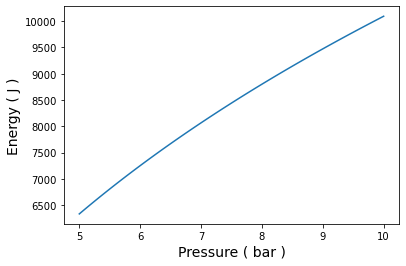

In [31]:
gamma = 1.4
#eta_ef = 0.8
def E_per_ndot(P_h, P_l,T_in,eta_eff):
    P_ratio_term = (P_h/P_l)**((gamma-1)/gamma)-1
    E_comp = (gamma)/(gamma-1)*(8.3145*T_in/eta_eff)*P_ratio_term
    return E_comp
Ph_ran = np.linspace(5,10, 101)
E_res = []
### TESTING ###
for ph in Ph_ran:
    E_tmp = E_per_ndot(ph,1,298.15, 0.8)
    E_res.append(E_tmp)
plt.plot(Ph_ran, np.array(E_res))
plt.xlabel('Pressure ( bar )',fontsize = 14)
plt.ylabel('Energy ( J )',fontsize = 14)
plt.show()
### TESTING ###


In [32]:
def E_per_ndot2(Ph1,Ph2,Pf,Pl,
                y_prod,x_prod1,T_input,eta1,eta2):
    E1 = E_per_ndot(Ph1,Pf,T_input,eta1)
    E2 = E_per_ndot(Ph2,Pl,T_input,eta2)
    numo = E1+E2*y_prod/x_prod1
    denom = y_prod
    E_tot_over_ndot_prod = numo/denom
    return E_tot_over_ndot_prod

## PSA2():Cascade PSA process

In [33]:
def PSA2(P_high1,P_high2,P_low,P_feed,
         iso_input,dH_input,Tref_input,
         yfeed1,Tfeed,x_gu1, x_gu2):
    Rec1,i_lead1, x_ex1 = rec(x_gu1, P_high1, P_low,
                             iso_input, dH_input,Tref_input,
                              yfeed1,Tfeed)
    yfeed2 = np.array([x_ex1,1-x_ex1])
    Rec2,i_lead2, x_ex2 = rec(x_gu2, P_high2, P_low,
                             iso_input, dH_input,Tref_input,
                              yfeed2,Tfeed)
    eta1_in = 0.8
    eta2_in = 0.8
    if Rec1 > 0 and Rec2 > 0:
        E_per_prod = E_per_ndot2(P_high1,P_high2,P_feed,P_low,
                                 yfeed1[0],x_ex1,Tfeed,
                                 eta1_in,eta2_in)
    return E_per_prod,x_ex2

# Execution for Various Adsorbents

## Ideal PSA Simul.

In [34]:
P_h_range = np.arange(1.1,30.1,0.25)

T_feed_in = 313         # (K) temperature or 298K
T_tri = [298.15,]*2
#y_feed_in = np.array([0.83356,0.1644])
y_ethy = 9/10
#y_ethy = 0.83356
y_feed_in = np.array([1-y_ethy,y_ethy])
Rec_list_set = []
leading_index_set = []
xx_list_set = []
#Pl_list = np.linspace(0.004,0.5,30)


for binn,dH,nam in zip(bins_CO2,dH_CO2,Name_list):
    Rec_list = []
    leading_index = []
    xx_list = []
    x_guess = np.array([0.05,0.95])
    for ph in P_h_range:
        rec_tmp,l_ind,x_tmp = rec(x_guess[0], ph,1,
                                  binn, dH, T_tri,y_feed_in, T_feed_in)
        #x_guess[0] = x_tmp*1.01
        Rec_list.append(rec_tmp)
        leading_index.append(l_ind)
        xx_list.append(x_tmp)
    Rec_list_set.append(Rec_list)
    leading_index_set.append(leading_index)
    xx_list_set.append(xx_list)
    print(nam)
    #print(Rec_list[-1])

175
193


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


222
244
279
385
386
387
388
490
491
1149
1161
1542
1689
1925
2190
2229
2276
2277
2278
2279
2280


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


2282
2305
2334
2434
2452
2468
2528
2529
2530
2531
2534
2535
2536
2537
2538
2539
2540
2541
2542
2549
2569
2633
2709
2733
2753
2764
2768
2769
2780
2781
2782
2784
2816
2817
2819
2822
2824
2845
538


# Sorting and Graphs

## Sorting

In [37]:
xx_sort_tmp = []
for i in range(len(xx_list_set)):
    xx_tmm = np.reshape(np.array(xx_list_set[i]),[-1])
    xx_sort_tmp.append(xx_tmm)
xx_sort_tmp = np.array(xx_sort_tmp)

Sort_target = np.reshape(np.array(xx_sort_tmp)[:,-1],-1)
#print(Sort_target)
arg_st = np.argsort(Sort_target)[::-1]
Name_sort = np.array(Name_list)[arg_st]

xx_sort = xx_sort_tmp[arg_st,:]
leading_sort = np.array(leading_index_set)[arg_st]
#is_exp_sort = is_exp[arg_st]

#print(P_h_range[-5]*100)
#print(Name_sort)
#print(Rec_sort[:,-5])

In [38]:
iii = 1
for NNN in Name_sort[:8]:
    print('{}:'.format(iii),
          '{0:4d} //'.format(NNN), 'Index : {}'.format(arg_st[iii-1]) )
    iii = iii+1

1: 2536 // Index : 35
2: 2535 // Index : 34
3:  538 // Index : 61
4: 2534 // Index : 33
5: 2542 // Index : 41
6: 2539 // Index : 38
7: 2538 // Index : 37
8: 2540 // Index : 39


## Graphs

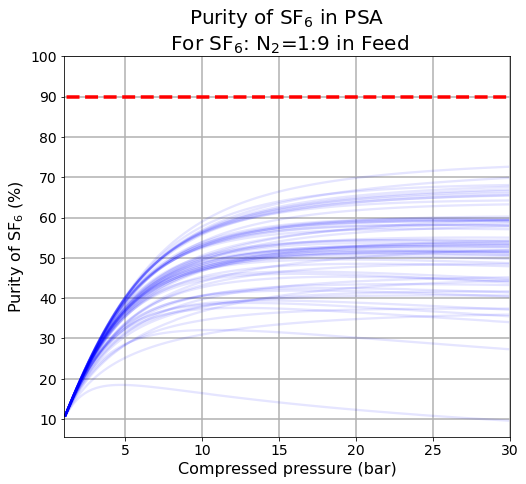

In [39]:
line_len = [1,2,4]
space_len = [1,2,4]
l_style = [(0,())]
for line in line_len:
    for space in space_len:
        style_temp = (line, space)
        l_style.append((0,style_temp))
L_styles = ['solid','dotted','dashdot','dashed'] + [(0,(3,5,1,5,1,5))]
c_list = ['k','b','g','r']
cc = 0
lc = 0
## Semilog graph
plt.figure(figsize= [8,7])
for RR,nn in zip(xx_sort,Name_sort):
    plt.plot(P_h_range,np.array(RR)*100,label = nn,
                 color = 'b',linewidth = 2.3,alpha=0.1)
    #c_list[cc]
   # linestyle =L_styles[lc]
    lc = lc + 1
    if lc  > len(L_styles)-1:
        cc = cc + 1
    if lc > len(L_styles)-1:
        lc = 0
    if cc > len(c_list)-1:
        cc = 0
plt.plot([0,P_h_range[-1]],[90 ,90],ls='--',lw='3.5',color='r')
## Grid
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)
## Legend
#plt.legend(fontsize = 13,loc = (1.02,0.08))
## x,y axis
plt.xlabel('Compressed pressure (bar)',fontsize = 16)
plt.ylabel('Purity of SF$_6$ (%)',fontsize= 16)
plt.xlim([1.0, 30])
#plt.xticks(ticks= [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
#           labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],
#           fontsize = 12.5)
plt.xticks(fontsize =14)
plt.yticks(ticks= [10,20,30,40,50,60,70,80,90,100],
           labels = ['10','20','30','40','50','60','70','80','90','100'],
           fontsize = 14)
plt.title('Purity of SF$_6$ in PSA\n For SF$_6$: N$_2$=1:9 in Feed',fontsize = 20)
plt.savefig('Purity_PSA_1vs9.png')
plt.show()

## Save above data

In [40]:
print(np.array(xx_sort).T.shape)
print(np.reshape(P_h_range,[-1,1]).shape)

(116, 62)
(116, 1)


In [41]:
save_4_2_graph = np.concatenate((np.reshape(P_h_range,[-1,1]), np.array(xx_sort).T),1)
save_4_2_graph_pd = pd.DataFrame(save_4_2_graph)
save_4_2_graph_pd.to_excel('SecNum_4_2_single_purity.xlsx')

# Cascade PSA Proces

## Take Sample

In [42]:
ind_sam = 12
bin_sam = bins_CO2[ind_sam]
dH_sam = dH_CO2[ind_sam]
Name_sam = Name_list[ind_sam]

## Execution of Cas. PSA sim.

In [43]:
#P_ran_1 = np.linspace(6,20,14*2+1)
#P_ran_2 = np.linspace(6,20,14*2+1)
P_ran_1 = np.linspace(3,10,3*2+1)
P_ran_2 = np.linspace(3,10,3*2+1)
P_low_interm = 1

T_tri2 = [298,298]

P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 298

E_per_n_2d =[]
x_prod_2d = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_sam,dH_sam,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_sam,dH_sam,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_sam,dH_sam,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_sam,dH_sam,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_sam,dH_sam,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    E_per_n_2d.append(EEE_list)
    x_prod_2d.append(xxx_list)
    


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


3.0 3.0
3.0 4.166666666666667
3.0 5.333333333333334
3.0 6.5
3.0 7.666666666666667
3.0 8.833333333333334
3.0 10.0
4.166666666666667 3.0
4.166666666666667 4.166666666666667
4.166666666666667 5.333333333333334
4.166666666666667 6.5
4.166666666666667 7.666666666666667
4.166666666666667 8.833333333333334
4.166666666666667 10.0
5.333333333333334 3.0
5.333333333333334 4.166666666666667
5.333333333333334 5.333333333333334
5.333333333333334 6.5
5.333333333333334 7.666666666666667
5.333333333333334 8.833333333333334
5.333333333333334 10.0
6.5 3.0
6.5 4.166666666666667
6.5 5.333333333333334
6.5 6.5
6.5 7.666666666666667
6.5 8.833333333333334
6.5 10.0
7.666666666666667 3.0
7.666666666666667 4.166666666666667
7.666666666666667 5.333333333333334
7.666666666666667 6.5
7.666666666666667 7.666666666666667
7.666666666666667 8.833333333333334
7.666666666666667 10.0
8.833333333333334 3.0
8.833333333333334 4.166666666666667
8.833333333333334 5.333333333333334
8.833333333333334 6.5
8.833333333333334 7.66666

# Graph: 2D

## Energy consumption

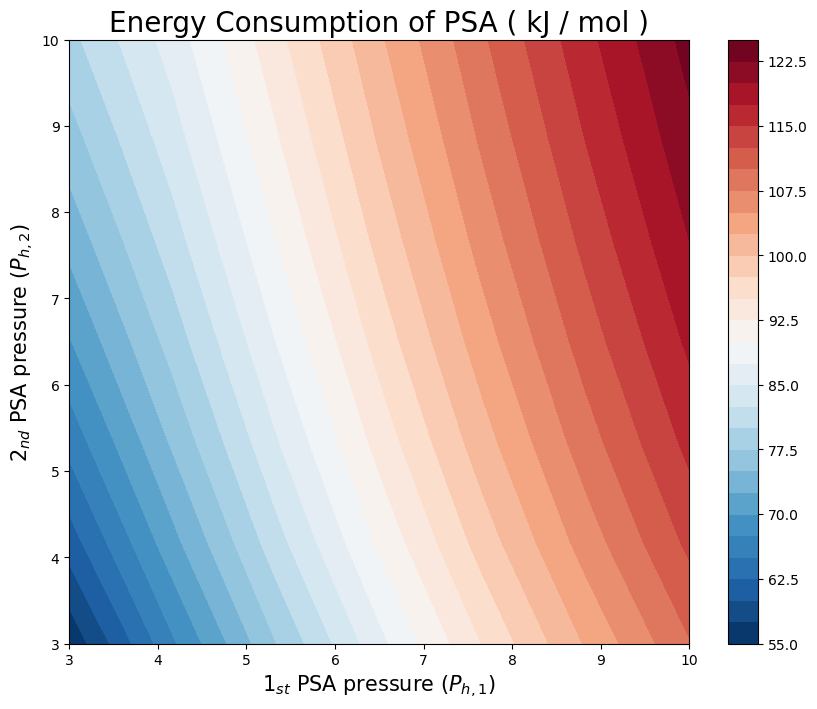

In [45]:
## INTO Array
E_per_n_arr = np.array(E_per_n_2d)
x_prod_arr = np.array(x_prod_2d)

## Graph
fig1,ax1 = plt.subplots(figsize = [10,8],dpi = 100)
ctr1 = ax1.contourf(P_ran_1,P_ran_2,E_per_n_arr.T/1000,levels = 30,cmap="RdBu_r")
fig1.colorbar(ctr1,ax=ax1)
#ax1.plot(p1_sort, p2_sort,'b-.',lw = 2.8 )
#ax1.text(6.5,7.4,'Recovery = 70%',
#         fontdict = {'size':12,'color': 'blue','weight':'bold'})
ax1.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
ax1.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
ax1.set_title('Energy Consumption of PSA ( kJ / mol )',fontsize = 20)
## x and y axis
#ax1.set_xlim(4.5,12.5)
#ax1.set_ylim(4.5,12.5)
#ax1.set_xticks([5,6,7,8,9,10,11,12])
#ax1.set_yticks([5,6,7,8,9,10,11,12])
#fig1.show()

fig1.savefig('E_cas_PSA.png')

## SF6 purity

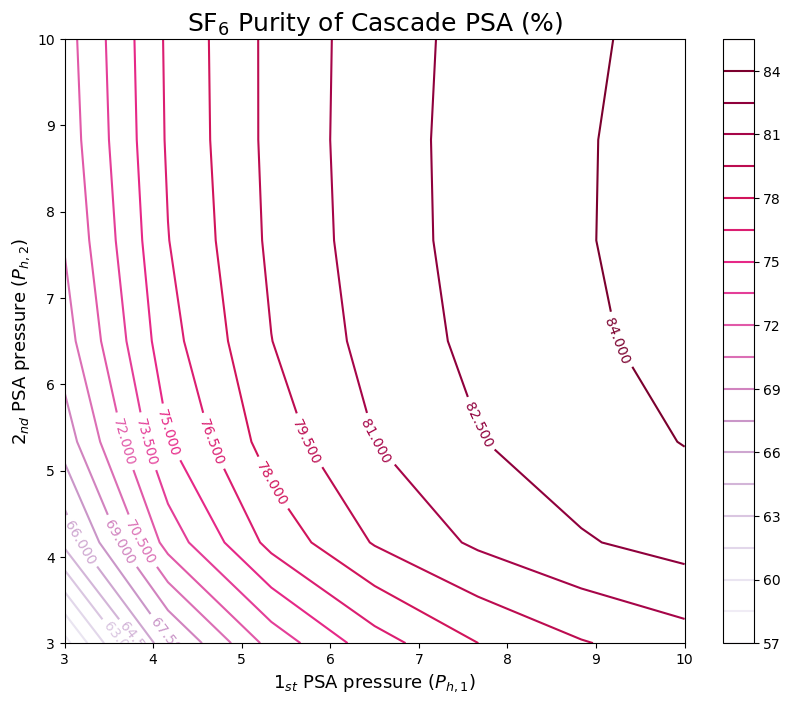

In [46]:
### INTO Array ###
x_prod_arr = np.array(x_prod_2d)

fig2,ax2 = plt.subplots(figsize = [10,8],dpi = 100)
ctr2 = ax2.contour(P_ran_1,P_ran_2,x_prod_arr.T*100,levels = 25,cmap="PuRd")
#ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
fig2.colorbar(ctr2,ax = ax2)

ax2.clabel(ctr2)

ax2.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 13)
ax2.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 13)
ax2.set_title('SF$_6$ Purity of Cascade PSA (%)',fontsize = 18)
## x and y axis
#ax2.set_xlim(2,5)
#ax2.set_ylim(2,5)
#ax2.set_xticks([5,6,7,8,9,10,11,12])
#ax2.set_yticks([5,6,7,8,9,10,11,12])  
#fig2.show()

fig2.savefig('Purity_cas_PSA.png')

# Sensitivity Analysis for Cascade PSA

## Purities at $P_{h,1} = 5$ bar

In [47]:
P_h1_fix = 5
P_h2_ran = np.linspace(3,10)
P_low_interm = 1
P_feed2 = 1
T_tri2 = [298,]*2
y_feed2 = [0.1,0.9]
T_feed2 = 313


xx_sensi_result = []

for binn,dH,nam in zip(bins_CO2,dH_CO2,Names_CO2):
    print(nam)
    xx_list_tmp = []
    for pp in P_h2_ran:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                              binn,dH,T_tri2,
                              y_feed2, T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                  binn,dH,T_tri2,
                                  y_feed2, T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                      binn,dH,T_tri2,
                                      y_feed2, T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp,x_tmp = PSA2(P_h1_fix,pp,P_low_interm, P_feed2,
                                          binn,dH,T_tri2,
                                          y_feed2, T_feed2,xg1,xg2)
        xx_list_tmp.append(x_tmp)
    xx_sensi_result.append(xx_list_tmp)
        

175
193


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


222


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


244
279
385
386
387
388
490
491
1149
1161
1542
1689
1925
2190
2229
2276
2277
2278
2279
2280
2282
2305
2334
2434
2452
2468
2528
2529
2530
2531
2534
2535
2536
2537
2538
2539
2540
2541
2542
2549
2569
2633
2709
2733
2753
2764
2768
2769
2780
2781
2782
2784
2816
2817
2819
2822
2824
2845
538


## Graph: Cascade purity for diff. $P_{h,1}$ 

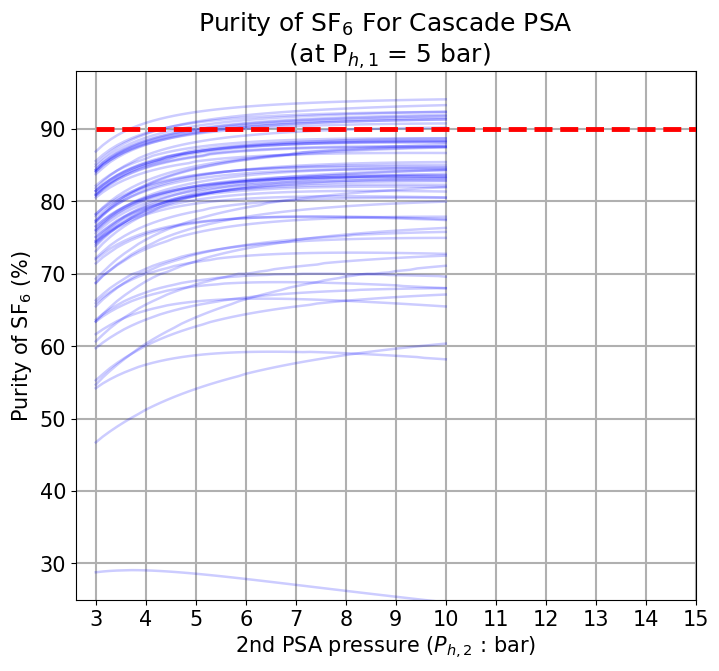

In [48]:
xx_res_arr = np.reshape(xx_sensi_result,[len(Names_CO2),-1])

ii = 0
plt.figure(figsize= [8,7],dpi = 100)
for i in range(xx_res_arr.shape[0]):
    plt.plot(P_h2_ran, xx_res_arr[ii]*100,
             color = 'b',
             linewidth = 1.8,
             alpha=0.2)
    ii = ii+1
plt.plot([np.min(P_h2_ran),20],[90,90],ls='--',lw='3.5',color='r')
plt.grid(which = 'major',ls ='-',linewidth = 1.5)
#plt.grid(which = 'minor',ls ='-.',linewidth = 1.1)

plt.xlabel('2nd PSA pressure ($P_{h,2}$ : bar)',fontsize = 15)
plt.ylabel('Purity of SF$_6$ (%)',fontsize= 15)
plt.xlim([2.6,15])
plt.ylim([25,98])
plt.xticks( np.arange(3,16,step = 1),fontsize = 15)
plt.yticks(fontsize = 15)

plt.title('Purity of SF$_6$ For Cascade PSA \n (at P$_{h,1}$ = 5 bar)',fontsize = 18)
plt.savefig('Recovery_vacuu_1vs9_full.png')


## Save above data

In [49]:
print(np.reshape(P_h2_ran,[-1,1]).shape)
print(xx_res_arr.shape)

(50, 1)
(62, 50)


In [50]:
save_7_2_graph = np.concatenate((np.reshape(P_h2_ran,[-1,1]), xx_res_arr.T),1)
save_7_2_graph_pd = pd.DataFrame(save_7_2_graph).to_excel('SecNum_7_2_single_purity.xlsx')

# Maximum Purity of Cascade PSA

## All purity for diff. adsorbenets

In [51]:
Ph1_test= np.linspace(3,10,7*2+1)
Ph2_test= np.linspace(3,10,7*2+1)
x_max_list = []

P_low_interm = 1
P_feed2 = 1
T_tri2 = [298,]*2
y_feed2 = [0.1,0.9]
T_feed2 = 313

for binn,nam,dH in zip(bins_CO2,Names_CO2,dH_CO2):
    x_all_list = []
    print(nam)
    for pp1 in Ph1_test:
        for pp2 in Ph2_test:
            try:
                xg1 = 0.3
                xg2 = 0.7
                E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                   binn,dH,T_tri2,
                                   y_feed2, T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.75
                    E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                       binn,dH,T_tri2,
                                       y_feed2, T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.4
                        xg2 = 0.85
                        E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                           binn,dH,T_tri2,
                                           y_feed2, T_feed2,xg1,xg2)
                    except:
                        try:
                            xg1 = 0.7
                            xg2 = 0.90
                            E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                               binn,dH,T_tri2,
                                               y_feed2, T_feed2,xg1,xg2)
                        except:
                            xg1 = 0.8
                            xg2 = 0.98
                            E_tmp,x_tmp = PSA2(pp1,pp2,P_low_interm, P_feed2,
                                               binn,dH,T_tri2,
                                               y_feed2, T_feed2,xg1,xg2)
            x_all_list.append(x_tmp)
    x_max_list.append(np.max(x_all_list))
            


175
193


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


222


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


244
279
385
386
387
388
490
491
1149
1161
1542
1689
1925
2190
2229
2276
2277
2278
2279
2280
2282
2305
2334
2434
2452
2468
2528
2529
2530
2531
2534
2535
2536
2537
2538
2539
2540
2541
2542
2549
2569
2633
2709
2733
2753
2764
2768
2769
2780
2781
2782
2784
2816
2817
2819
2822
2824
2845
538


## Sorting the results

In [52]:
arg_xmax=  np.argsort(x_max_list)[::-1]
xx_xmax = np.array(x_max_list)[arg_xmax]
Names_xx = Names_CO2[arg_xmax]
dH_xx = dH_CO2[arg_xmax]
bin_xx = np.array(bins_CO2)[arg_xmax]

for ii in range(len(Names_xx)):
    print(Names_xx[ii], ': ', xx_xmax[ii] )
xx_xmax_single = []
for x_single in xx_list_set:
    xmax_tmpp = np.max(x_single)
    xx_xmax_single.append(xmax_tmpp)
xx_xmax_single_sort = np.array(xx_xmax_single)[arg_xmax]

2536 :  0.9711559806284022
2535 :  0.9664062424631066
538 :  0.959985234838463
2534 :  0.9598579001004536
2542 :  0.9569869842620481
2539 :  0.9557083118325175
2538 :  0.9520148727138755
2540 :  0.9505131769659502
2541 :  0.9500009694368033
2537 :  0.9458506314450208
2822 :  0.9428759772257672
2280 :  0.9304229680719321
2468 :  0.9303836278323898
2279 :  0.9283754922678527
491 :  0.9270838873582686
385 :  0.9268649693612191
2824 :  0.9262634336642077
386 :  0.9257669021575731
2819 :  0.9228854401201088
2633 :  0.9224085545766216
388 :  0.9218103494951717
490 :  0.9209384301533681
244 :  0.9131293107757088
1689 :  0.9045096491350496
175 :  0.9002385049573001
193 :  0.8985998433791991
1149 :  0.8973035741077627
2753 :  0.8970489512611236
2305 :  0.8959136887446494
387 :  0.8956442575646939
2452 :  0.8925189021146515
2528 :  0.888050842414154
2282 :  0.8867339944309658
222 :  0.8859172440986883
2709 :  0.8850896968489438
1925 :  0.8845178558444526
279 :  0.8817356016569512
1161 :  0.88085

# Bar Graph: Cascade Maximum Purity

In [53]:
## SINGLE PSA ###
print('Single PSA Maximum Purity')
for indd in range(len(xx_xmax_single_sort)):
    print('{0:5d} : {1:8.4f} %'.format(Names_xx[indd],xx_xmax_single_sort[indd]*100))

Single PSA Maximum Purity
 2536 :  72.5821 %
 2535 :  69.8185 %
  538 :  68.0535 %
 2534 :  67.6125 %
 2542 :  66.9514 %
 2539 :  66.5594 %
 2538 :  66.0500 %
 2540 :  65.5668 %
 2541 :  65.4425 %
 2537 :  64.2288 %
 2822 :  63.2562 %
 2280 :  59.6793 %
 2468 :  60.2248 %
 2279 :  59.4879 %
  491 :  59.2851 %
  385 :  59.2993 %
 2824 :  59.4150 %
  386 :  59.0690 %
 2819 :  57.7890 %
 2633 :  58.5612 %
  388 :  58.2147 %
  490 :  58.0954 %
  244 :  57.1972 %
 1689 :  55.0392 %
  175 :  54.4376 %
  193 :  54.3458 %
 1149 :  54.1922 %
 2753 :  53.2624 %
 2305 :  53.6840 %
  387 :  53.7386 %
 2452 :  53.1840 %
 2528 :  51.7489 %
 2282 :  52.8270 %
  222 :  52.9048 %
 2709 :  51.4759 %
 1925 :  52.3782 %
  279 :  51.8120 %
 1161 :  51.6435 %
 2784 :  51.9211 %
 2569 :  51.1647 %
 2334 :  50.9504 %
 1542 :  50.3823 %
 2549 :  49.5802 %
 2277 :  48.5260 %
 2733 :  48.4816 %
 2780 :  45.3314 %
 2781 :  46.0409 %
 2276 :  46.5901 %
 2816 :  45.1652 %
 2845 :  43.4638 %
 2531 :  42.4851 %
 2769

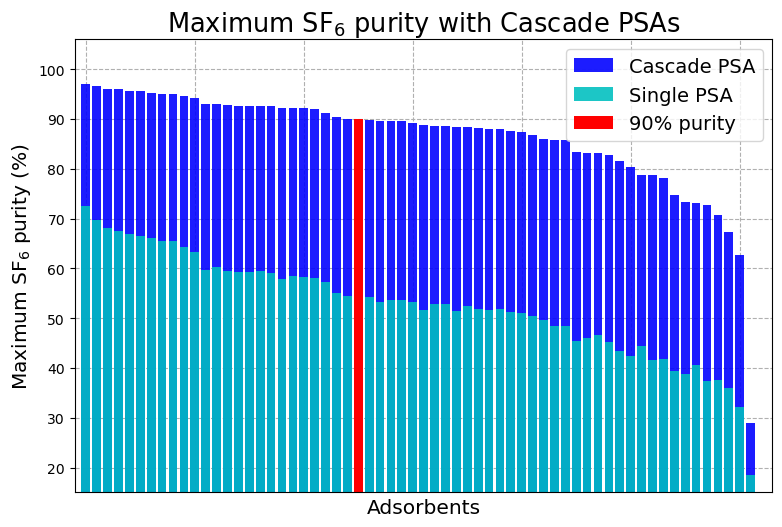

In [54]:
fig_m, ax_m = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(linestyle  = '--')
ax_m.set_axisbelow(True)

cc = 0
for xx in xx_xmax:
    if xx < 0.9:
        N90 = cc
        break
    cc = cc + 1

bar1 = ax_m.bar(np.arange(len(xx_xmax)),xx_xmax*100,
              color = 'b', alpha = 0.89,
              label = 'Cascade PSA')
bar2 = ax_m.bar(np.arange(len(xx_xmax_single_sort)),xx_xmax_single_sort*100,
               color = 'c', alpha = 0.89,
               label = 'Single PSA')
bar_90p = ax_m.bar(N90, 90, color = 'r',
                label = '90% purity')
ax_m.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_m.set_xlabel('Adsorbents',fontsize = 14.5)

ax_m.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_m.set_yticks([20,30,40,50,60,70,80,90,100])
ax_m.set_yticklabels([20,30,40,50,60,70,80,90,100])

ax_m.set_xlim([-1,len(xx_list_set)+1])
ax_m.set_ylim([15,106])
#ax_m.set_xticks(np.arange(0,len(xx_xmax)))
frame1 = plt.gca()
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)

for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
    
plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [56]:
Over90 = xx_xmax[xx_xmax> 0.9]
print(len(Over90))
print(Names_xx[0:5])

25
[2536 2535  538 2534 2542]


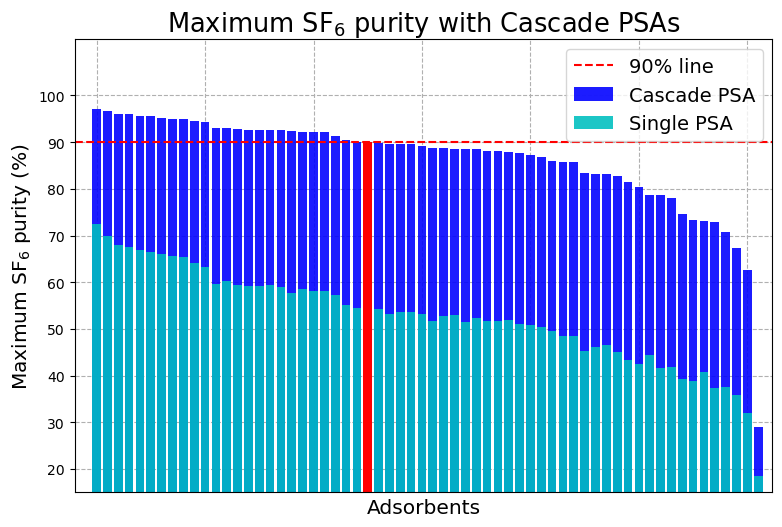

In [57]:
fig_m2, ax_m2 = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(linestyle  = '--')
ax_m2.set_axisbelow(True)

cc = 0
for xx in xx_xmax:
    if xx < 0.9:
        N90 = cc
        break
    cc = cc + 1

bar1 = ax_m2.bar(np.arange(len(xx_xmax)),xx_xmax*100,
              color = 'b', alpha = 0.89, 
              label = 'Cascade PSA')
bar2 = ax_m2.bar(np.arange(len(xx_xmax_single_sort)),xx_xmax_single_sort*100,
               color = 'c', alpha = 0.89,
               label = 'Single PSA')

line_90p = ax_m2.plot([-5,len(x_max_list)*1.01], [90,90], 'r--',
                label = '90% line',lw = 1.5)
bar_90p = ax_m2.bar(N90, 90, color = 'r')

ax_m2.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_m2.set_xlabel('Adsorbents',fontsize = 14.5)
ax_m2.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_m2.set_yticks([20,30,40,50,60,70,80,90,100])
ax_m2.set_yticklabels([20,30,40,50,60,70,80,90,100])

ax_m2.set_xlim([-2,len(x_max_list)*1.005])
ax_m2.set_ylim([15,112])


frame1 = plt.gca()
## NO x-axis ticks and labels ##
for xlabel_i in frame1.axes.get_xticklabels():
    xlabel_i.set_visible(False)
    xlabel_i.set_fontsize(0.0)
for tick in frame1.axes.get_xticklines():
    tick.set_visible(False)
    
    
plt.legend(fontsize = 14)
plt.savefig('Maximum_PSA.png')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [73]:
print('Cascade PSA')
print('{0:8s}  :'.format('Ads. Name'), ' {0:23s}'.format('SF6 Purity (%)') )
for i in range(len(Names_xx)):
    print('{0:9d}  :'.format(Names_xx[i]), '{0:9.5f}'.format(xx_xmax[i]))



Cascade PSA
Ads. Name  :  SF6 Purity (%)         
     2536  :   0.97980
     2535  :   0.97801
     2534  :   0.97085
      538  :   0.97053
     2542  :   0.96844
     2539  :   0.96711
     2538  :   0.96553
     2540  :   0.96438
     2541  :   0.96356
     2537  :   0.95935
     2822  :   0.95810
     2824  :   0.94528
     2468  :   0.94391
     2280  :   0.94237
     2279  :   0.94119
      491  :   0.94002
      385  :   0.93957
     2819  :   0.93956
     2633  :   0.93830
      386  :   0.93829
      388  :   0.93453
      490  :   0.93369
      244  :   0.92542
     1689  :   0.91963
     1149  :   0.91693
      175  :   0.91366
     2305  :   0.91329
     2753  :   0.91172
      193  :   0.91130
     2452  :   0.91119
      387  :   0.90906
     2784  :   0.90736
     2282  :   0.90109
     2528  :   0.90091
     2709  :   0.90071
      222  :   0.89941
     1925  :   0.89732
     1161  :   0.89620
      279  :   0.89533
     2569  :   0.88935
     2334  :   0.88618
     15

In [59]:
print('Single PSA')
print('{0:8s}  :'.format('Ads. Name'),' {0:23s}'.format('SF6 Purity (%)') )
for i in range(len(Names_xx)):
    print('{0:9d}  :'.format(Names_xx[i]), '{0:9.5f}'.format(xx_xmax_single_sort[i]))

Single PSA
Ads. Name  :  SF6 Purity (%)         
     2536  :   0.72582
     2535  :   0.69819
      538  :   0.68053
     2534  :   0.67613
     2542  :   0.66951
     2539  :   0.66559
     2538  :   0.66050
     2540  :   0.65567
     2541  :   0.65443
     2537  :   0.64229
     2822  :   0.63256
     2280  :   0.59679
     2468  :   0.60225
     2279  :   0.59488
      491  :   0.59285
      385  :   0.59299
     2824  :   0.59415
      386  :   0.59069
     2819  :   0.57789
     2633  :   0.58561
      388  :   0.58215
      490  :   0.58095
      244  :   0.57197
     1689  :   0.55039
      175  :   0.54438
      193  :   0.54346
     1149  :   0.54192
     2753  :   0.53262
     2305  :   0.53684
      387  :   0.53739
     2452  :   0.53184
     2528  :   0.51749
     2282  :   0.52827
      222  :   0.52905
     2709  :   0.51476
     1925  :   0.52378
      279  :   0.51812
     1161  :   0.51644
     2784  :   0.51921
     2569  :   0.51165
     2334  :   0.50950
     154

## Screening based on $x_{max}$

### (Names_xcut, bins_xcut,dH_xcut)

In [60]:
### Cutting based on the maximum purity of cascade PSA processs
arg_xcut = xx_xmax>0.9

Names_xcut = Names_xx[arg_xcut]
bins_xcut = np.array(bin_xx)[arg_xcut]
dH_xcut = np.array(dH_xx)[arg_xcut]

xx_screen = xx_xmax[arg_xcut]
arg_cut_sort = np.argsort(xx_screen)[::-1]
xx_screen_sort = xx_screen[arg_cut_sort]
Names_screen_sort = Names_xcut[arg_cut_sort]
Names_screen_sort_str = []

print('{0:8s}  :'.format('Ads. Name'), ' {0:23s}'.format('SF6 Purity (%)') )
for (namm, binn, xxxx) in zip(Names_screen_sort,bins_xcut, xx_screen_sort):
    print('{0:9d}  :'.format(namm), '{0:9.3f} %'.format(xxxx*100))



Ads. Name  :  SF6 Purity (%)         
     2536  :    97.116 %
     2535  :    96.641 %
      538  :    95.999 %
     2534  :    95.986 %
     2542  :    95.699 %
     2539  :    95.571 %
     2538  :    95.201 %
     2540  :    95.051 %
     2541  :    95.000 %
     2537  :    94.585 %
     2822  :    94.288 %
     2280  :    93.042 %
     2468  :    93.038 %
     2279  :    92.838 %
      491  :    92.708 %
      385  :    92.686 %
     2824  :    92.626 %
      386  :    92.577 %
     2819  :    92.289 %
     2633  :    92.241 %
      388  :    92.181 %
      490  :    92.094 %
      244  :    91.313 %
     1689  :    90.451 %
      175  :    90.024 %


# Bar Graph: Screened Purity

## Purity Screening

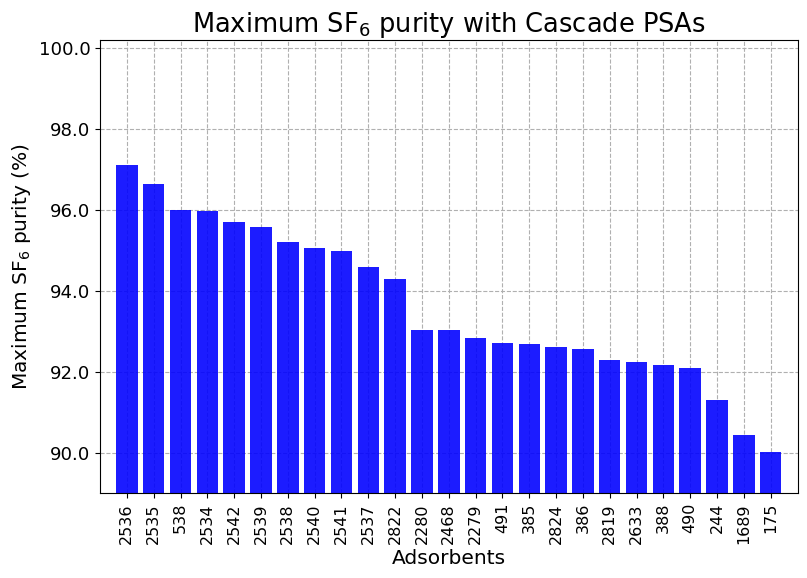

In [61]:
Names_screen_sort_str = []
for NNam in Names_screen_sort:
    Names_screen_sort_str.append(str(NNam))

fig_s, ax_s = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_s.set_axisbelow(True)

bar1 = ax_s.bar(np.arange(len(xx_screen_sort)),xx_screen_sort*100,
              color = 'b', alpha = 0.89,
              label = 'Adsorbents (Above 90% purity)')
ax_s.set_ylabel('Maximum SF$_6$ purity (%)',fontsize = 14.5)
ax_s.set_xlabel('Adsorbents',fontsize = 14.5)

ax_s.set_title('Maximum SF$_6$ purity with Cascade PSAs',fontsize = 18.5)
ax_s.set_xticks(np.arange(len(Names_screen_sort)))
ax_s.set_xticklabels(Names_screen_sort_str,rotation = 90,fontsize = 11.5)

ax_s.set_ylim([89,100.2])
yticklab = ax_s.get_yticks()
ax_s.set_yticklabels(yticklab, fontsize = 13)

ax_s.set_xlim([-1,len(xx_screen_sort)])
#ax_m.set_xticks(np.arange(0,len(xx_xmax)))
   
#plt.legend(fontsize = 14)
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [77]:
print(Names_screen_sort)

[2536 2535 2534  538 2542 2539 2538 2540 2541 2537 2822 2824 2468 2280
 2279  491  385 2819 2633  386  388  490  244 1689 1149  175 2305 2753
  193 2452  387 2784 2282 2528 2709]


## Save above data

In [62]:
x_sav = np.reshape(xx_screen_sort,[-1,1])
Nam_sav = np.reshape(Names_screen_sort,[-1,1])

In [63]:
Mat2save = np.concatenate((Nam_sav,x_sav))
save_10_1_graph = np.concatenate((np.reshape(P_h2_ran,[-1,1]), xx_res_arr.T),1)
save_10_1_graph_pd = pd.DataFrame(Mat2save).to_excel('SecNum_10_1_xmax_Casc.xlsx')

# Functions for Optimization

## objPSA2(): Objective function

In [64]:
def objPSA2(P_high1, P_high2, P_low, P_feed,
           iso_input,dH_input, Tref_input,
           yfeed1,Tfeed):
    try:
        xgue1= 0.3
        xgue2 = 0.7
        E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                           iso_input,dH_input,Tref_input,
                           yfeed1,Tfeed,xgue1,xgue2)
    except:
        try:
            xgue1 = 0.4
            xgue2 = 0.75
            E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                               iso_input,dH_input,Tref_input,
                               yfeed1,Tfeed,xgue1,xgue2)
        except:
            try:
                xgue1 = 0.4
                xgue2 = 0.85
                E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                   iso_input,dH_input,Tref_input,
                                   yfeed1,Tfeed,xgue1,xgue2)
            except:
                try:
                    xgue1 = 0.7
                    xgue2 = 0.9
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
                except:
                    xgue1 = 0.8
                    xgue2 = 0.98
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
    return E_tmp

## consx(): Constraints

In [65]:
def consPSA2(P_high1, P_high2, P_low, P_feed,
             iso_input,dH_input, Tref_input,
             yfeed1,Tfeed):
    try:
        xgue1= 0.3
        xgue2 = 0.7
        E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                           iso_input,dH_input,Tref_input,
                           yfeed1,Tfeed,xgue1,xgue2)
    except:
        try:
            xgue1 = 0.4
            xgue2 = 0.75
            E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                               iso_input,dH_input,Tref_input,
                               yfeed1,Tfeed,xgue1,xgue2)
        except:
            try:
                xgue1 = 0.4
                xgue2 = 0.85
                E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                   iso_input,dH_input,Tref_input,
                                   yfeed1,Tfeed,xgue1,xgue2)
            except:
                try:
                    xgue1 = 0.7
                    xgue2 = 0.9
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
                except:
                    xgue1 = 0.8
                    xgue2 = 0.98
                    E_tmp, x_tmp = PSA2(P_high1,P_high2, P_low,P_feed,
                                       iso_input,dH_input,Tref_input,
                                       yfeed1,Tfeed,xgue1,xgue2)
    return x_tmp

## Optim. Formulation (For a single Adsorbent)

In [66]:
ind_ad = 72
def obj_tmp(PPPP):
    ## Adsorbent conditions
    iso_tmp = bins_CO2[ind_ad]
    dH_tmp = dH_CO2[ind_ad]
    Name_tmp = Name_lilst[ind_ad]
    Tref_tmp = [298, 298]
    
    ## Situation conditions
    Pfeed_tmp = 1
    P_low_inter_tmp = 1
    yfeed_tmp = [0.1,  0.9]
    Tfeed_tmp = 313    
        
    EE_tmp, xx_tmp = objPSA2(PPPP[0], PPPP[1],P_low_inter_tmp, Pfeed_tmp,
                             iso_tmp, dH_tmp, Tref_tmp,
                             yfeed_tmp,Tfeed_tmp)
    return E_tmp
    

In [67]:
ind_ad = 72
def cons_tmp(PPPP):
    ## Adsorbent conditions
    iso_tmp = bins_CO2[ind_ad]
    dH_tmp = dH_CO2[ind_ad]
    Name_tmp = Name_lilst[ind_ad]
    Tref_tmp = [298, 298]
    
    ## Situation conditions
    Pfeed_tmp = 1
    P_low_inter_tmp = 1
    yfeed_tmp = [0.1,  0.9]
    Tfeed_tmp = 313    
        
    EE_tmp, xx_tmp = objPSA2(PPPP[0], PPPP[1],P_low_inter_tmp, Pfeed_tmp,
                             iso_tmp, dH_tmp, Tref_tmp,
                             yfeed_tmp,Tfeed_tmp)
    return xx_tmp-0.9


In [68]:
def optim_form(iso_in,dH_in,Tref_in,
              yfeed_in, Tfeed_in, Pfeed_in, Plow_in):
    def obj_tmppp(PPPP):
        mag = 1
#        turnon = 0
        if PPPP[0] < 3.0 or PPPP[1] < 3.0:
            mag = 1+100*np.sum((np.array(PPPP) - np.array([3,3]))**2)
            PP_re = [3.0,3.0]
            turnon = 1
        else:
            PP_re = PPPP
        EE_tmp = objPSA2(PP_re[0], PP_re[1],Plow_in, Pfeed_in,
                                 iso_in, dH_in, Tref_in,
                                 yfeed_in,Tfeed_in)
#        if turnon > 0:
#            print(mag)
        return mag*EE_tmp/1E3  # in kJ/mol
    def const_tmppp(PPPP):
        mag = 1
        if PPPP[0] < 3 or PPPP[1] < 3:
            PP_re = [3,3]
            mag = 1+ 100*np.sum((np.array(PPPP)-np.array([3,3]))**2)
            print(mag)
        else:
            PP_re = PPPP
        xx_tmp = consPSA2(PP_re[0], PP_re[1],Plow_in, Pfeed_in,
                          iso_in, dH_in, Tref_in,
                          yfeed_in,Tfeed_in)
        return mag*(xx_tmp-0.9)*5000
    return [obj_tmppp,const_tmppp]
nnn = 3
obj_ad_tmp, const_ad_tmp = optim_form(bin_xx[nnn], dH_xx[nnn], [289,289],
                                      [0.1,0.9], 313,1,1)  

In [69]:
### TEST ###
print(obj_ad_tmp([8,8]))
print(const_ad_tmp([10,10]))

[110.18528298]
[293.37540776]


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


In [70]:
x00_tmp = [5,5]

opt_res_tmp = optim.minimize(obj_ad_tmp, x00_tmp, method = 'COBYLA',
                             constraints = {'type':'ineq','fun':const_ad_tmp},bounds=[3.2,20])
print(opt_res_tmp) ### in kJ/mol
#print(const_ad_tmp(opt_res_tmp.x))
xxx_opt = consPSA2(opt_res_tmp.x[0], opt_res_tmp.x[1],1, 1,
                   bin_xx[nnn], dH_xx[nnn], [298,298],
                   [0.1,0.9],313)
print(xxx_opt)
print(obj_ad_tmp(opt_res_tmp.x))


C:\Users\LeBlanc\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:539: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


     fun: 81.9580368805449
   maxcv: 6.656286632988895e-07
 message: 'Optimization terminated successfully.'
    nfev: 43
  status: 1
 success: True
       x: array([4.62946651, 5.77051994])
[0.90184291]
[81.95803688]


## Optim for various ads.

In [71]:
E_consu_list = []
P_opt_list = []
xx_opt_list = []
for binn,dHH,Namm in zip(bins_xcut,dH_xcut, Names_xcut):
   # print(Namm)
    ## Reference Temperature
    Tref_tmp = [298,298]
    ## Feed Conditions 
    Pfeed_tmp = 1
    yfeed_tmp = [0.1,0.9]
    Tfeed_tmp = 313
    
    ## Intermediate pressure
    Plow_tmp = 1
    objj, constt= optim_form(binn,dHH,Tref_tmp,
                             yfeed_tmp, Tfeed_tmp, Pfeed_tmp, Plow_tmp)
    x00_tmp = [10,10]
    opt_res_tmp = optim.minimize(objj, x00_tmp, method = 'COBYLA',
                                 constraints = {'type':'ineq','fun':constt},bounds=[3.2,20])
    P12_sol = opt_res_tmp.x
 #  print(P12_sol)
    E_consu = objPSA2(P12_sol[0], P12_sol[1],Plow_tmp, Pfeed_tmp,
                      binn, dHH, Tref_tmp,
                      yfeed_tmp,Tfeed_tmp)
    xx_opt = consPSA2(P12_sol[0], P12_sol[1],Plow_tmp, Pfeed_tmp,
                      binn, dHH, Tref_tmp,
                      yfeed_tmp,Tfeed_tmp)
    E_consu_list.append(E_consu)
    P_opt_list.append(P12_sol)
    xx_opt_list.append(xx_opt*100)
   # print(Namm +'is' + E_consu/1000)    

C:\Users\LeBlanc\anaconda3\lib\site-packages\scipy\optimize\_minimize.py:539: RuntimeWarning: Method COBYLA cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


3528.101797269309
3278.0928733998653
5498.184544483437


C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure


5034.07658747107
5091.546660766711


# Bar Graph: Optimized Energy

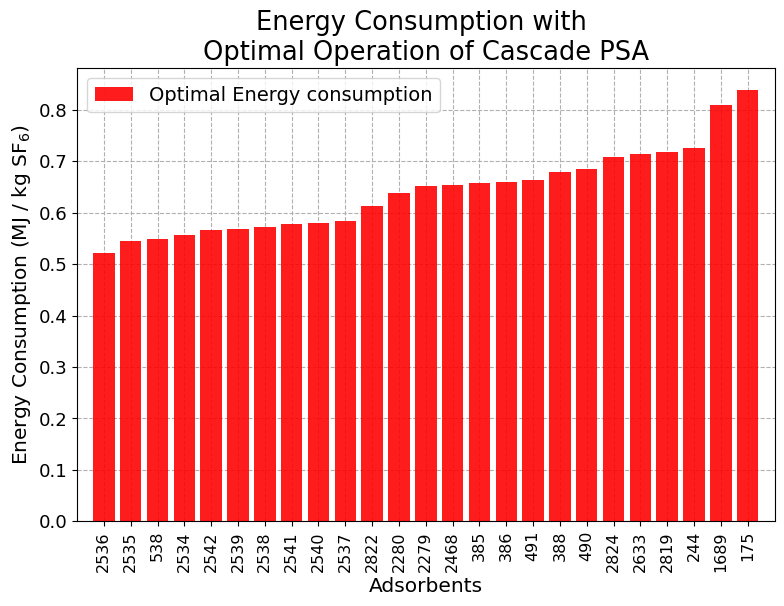

In [72]:
E_consu_arr = np.array(E_consu_list)
E_consu_arr = np.reshape(E_consu_arr, [-1,])
arg_sort_e = np.argsort(E_consu_arr)

E_consu_sort = E_consu_arr[arg_sort_e]
Names_sort_e = Names_xcut[arg_sort_e]
dH_sort_e = dH_xcut[arg_sort_e]
bins_sort_e = bins_xcut[arg_sort_e]
Popt_sort_e = np.array(P_opt_list)[arg_sort_e]

fig_e, ax_e = plt.subplots(figsize = [9,6],dpi = 100)
plt.grid(which = 'major',linestyle  = '--')
ax_e.set_axisbelow(True)

bar1 = ax_e.bar(np.arange(len(E_consu_arr)),E_consu_sort/146060,
                color = 'r', alpha = 0.89,
                label = 'Optimal Energy consumption')

ax_e.set_ylabel('Energy Consumption (MJ / kg SF$_6$)',fontsize = 14.5)
ax_e.set_xlabel('Adsorbents',fontsize = 14.5)

ax_e.set_title('Energy Consumption with \nOptimal Operation of Cascade PSA',fontsize = 18.5)
#ax_e.set_yticks([20,30,40,50,60,70,80,90,100])
#ax_e.set_yticklabels([20,30,40,50,60,70,80,90,100])

#ax_e.set_xlim([-2,len(E_consu_list)*1.01])
#ax_e.set_ylim([18,106])
#ax_e.set_xticks(np.arange(0,len(xx_xmax)))
ax_e.set_xticks(np.arange(len(Names_xcut)))
ax_e.set_xticklabels(Names_sort_e,rotation = 90,fontsize= 11.5)

plt.yticks(fontsize = 13)

#ax_e.set_ylim([60,107])
ax_e.set_xlim([-1,len(E_consu_list)])
frame1 = plt.gca()
#for xlabel_i in frame1.axes.get_xticklabels():
#    xlabel_i.set_visible(False)
#    xlabel_i.set_fontsize(0.0)

#for tick in frame1.axes.get_xticklines():
#    tick.set_visible(False)
    
plt.legend(fontsize = 14,loc = 'upper left')
plt.savefig('Energy_PSA_cascade.png')
plt.show()
#plt.figure(figsize =[9,6], dpi = 100)
#plt.bar(np.arange(len(xx_xmax)),xx_xmax, )

In [73]:
print(E_consu_sort[:5]/146060)


[0.52108265 0.54521795 0.54976772 0.55761555 0.56616469]


In [74]:
print(Names_sort_e)
print(Names_screen_sort)
print(E_consu_sort/146060)


[2536 2535  538 2534 2542 2539 2538 2541 2540 2537 2822 2280 2279 2468
  385  386  491  388  490 2824 2633 2819  244 1689  175]
[2536 2535  538 2534 2542 2539 2538 2540 2541 2537 2822 2280 2468 2279
  491  385 2824  386 2819 2633  388  490  244 1689  175]
[0.52108265 0.54521795 0.54976772 0.55761555 0.56616469 0.56841718
 0.57241628 0.57723132 0.57999771 0.58333936 0.61253924 0.63808263
 0.65122294 0.65435737 0.65786904 0.66039886 0.66333483 0.68009655
 0.68448077 0.70843312 0.71327127 0.71877324 0.72499888 0.81017363
 0.83912296]


Text(0.5, 0, 'Adsorbents')

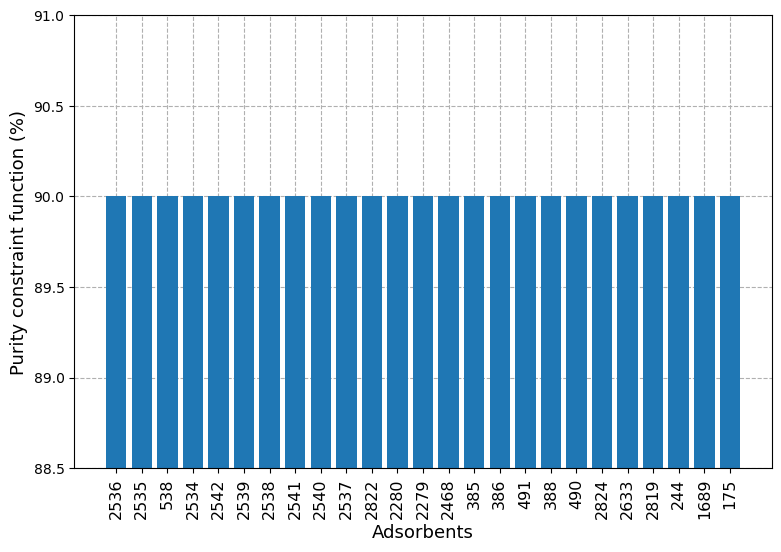

In [75]:
xx_sort_E = np.reshape(np.array(xx_opt_list)[arg_sort_e],-1)

fig_pu,ax_pu=plt.subplots(figsize = [9,6],dpi = 100)
ax_pu.set_axisbelow(True)
plt.grid(which = 'major', linestyle = '--')


plt.bar(np.arange(len(xx_sort_E)),xx_sort_E)
plt.xticks(np.arange(len(xx_sort_E)),
          labels = Names_sort_e,fontsize = 11.5,
           rotation = 90)
plt.ylim([88.5,91])
plt.ylabel('Purity constraint function (%)',fontsize = 13)
plt.xlabel('Adsorbents',fontsize = 13)

cooo = "copyri" + "ght"
print("The "+cooo + " of all the codes belongs to")
print("D",end="r.")
print("S.E.O.N", end=".G.B.I.N\n")
print("G.",end = "A.")


## Save above data

In [76]:
E_sav = np.reshape(E_consu_sort,[-1,1])
Nam_sav= np.reshape(Names_sort_e,[-1,1])


In [77]:
Mat2save = np.concatenate((Nam_sav,E_sav),1)
pd.DataFrame(Mat2save).to_excel('SecNum_12_1_E_Casc.xlsx')

# Position of Optimal Pressure

## Setting for 3 x 3 Graphs : Cascade purity

In [78]:
P1_rang = np.linspace(3,8,5*4+1)
P2_rang = np.linspace(3,8,5*4+1)
#P1_rang = np.linspace(3,20,3)
#P2_rang = np.linspace(3,20,3)

## Reference Temperature ##
Tref_tmp = [298,298]

## Feed Conditiosn ##
Pfeed_tmp = 1
yfeed_tmp = [0.1,0.9]
Tfeed_tmp = 313

## Intermediate pressure ##
Plow_tmp = 1
## Number of Andsorbent to show
N_show = 9
N_row = 3
N_column = np.int32(N_show/N_row)
#print(N_column)

In [79]:
print(Names_sort_e)

[2536 2535  538 2534 2542 2539 2538 2541 2540 2537 2822 2280 2279 2468
  385  386  491  388  490 2824 2633 2819  244 1689  175]


## 3 x 3 Graphs : Cascade purity

C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
<ipython-input-81-6be762747864>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_all.show()


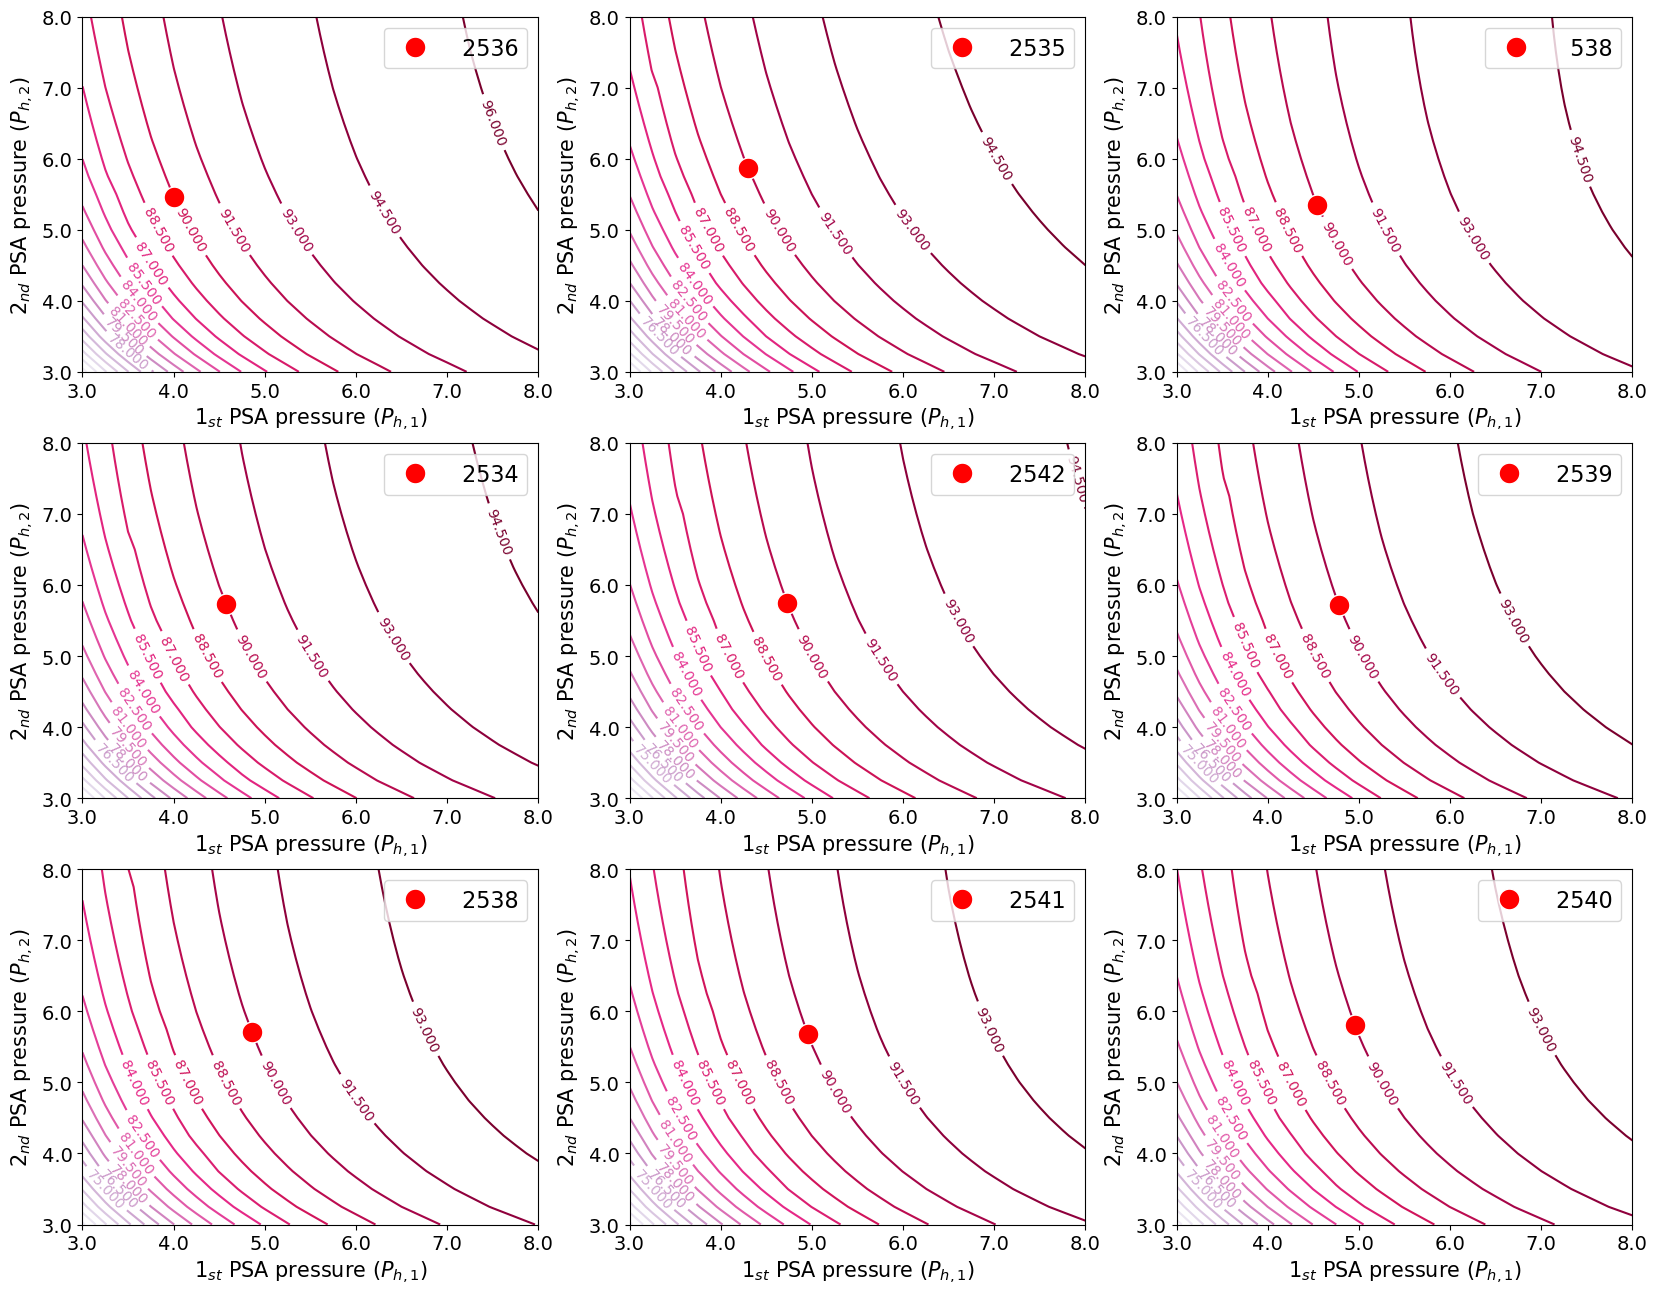

In [81]:
fig_all, ax_all = plt.subplots(N_row,N_column,
                               figsize = [20,16],
                               dpi = 100)
axx = 0
axy = 0
iiii = 0
for binnn,dHHH, Nameee in zip(bins_sort_e[:N_show],
                              dH_sort_e[:N_show],
                              Names_sort_e[:N_show]):
    x_bg_2D_list = []
    for ppp1 in P1_rang:
        x_bg_list_tmp = []
        for ppp2 in P2_rang:
            x_bg = consPSA2(ppp1,ppp2,Plow_tmp,Pfeed_tmp, binnn, dHHH,
                            Tref_tmp,yfeed_tmp,Tfeed_tmp)
            x_bg_list_tmp.append(x_bg[0])
        x_bg_2D_list.append(x_bg_list_tmp)
    
    x_bg_arr = np.array(x_bg_2D_list)
    
    ctr_tmp = ax_all[axx,axy].contour(P1_rang,P2_rang,x_bg_arr.T*100,
                                      levels = 25,cmap="PuRd")
    #ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
    #fig_all.colorbar(ctr_tmp,ax = ax_all[axx,axy])

    ax_all[axx,axy].clabel(ctr_tmp)
#    if iiii == 3:
#        ax_all[axx,axy].plot(4.8,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    elif iiii == 5:
#        ax_all[axx,axy].plot(4.95,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    else:
    ax_all[axx,axy].plot(Popt_sort_e[iiii][0],Popt_sort_e[iiii][1], 'o',
                         label = '{0:5d}'.format(Nameee),
                         markersize = 15, markerfacecolor = 'r',
                         markeredgecolor = [1,1,1])
    
    ax_all[axx,axy].legend(fontsize = 16)

    ax_all[axx,axy].set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
    ax_all[axx,axy].set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
    #ax_all[axx,axy].set_title('{0:6d}'.format(Nameee),fontsize = 20)
    xtt = ax_all[axx,axy].get_xticks()
    ytt = ax_all[axx,axy].get_xticks()
    ax_all[axx,axy].set_xticklabels(xtt,fontsize = 14)
    ax_all[axx,axy].set_yticklabels(ytt,fontsize = 14)
    iiii = iiii +1 
    axy = axy+1
    if axy >= N_row:
        axy = 0
        axx = axx+1
        
#fig_all.savefig('All_purity_w_opt.png')
fig_all.show()



In [82]:
print(x_bg_2D_list)

[[0.667562409214896, 0.6949399208610091, 0.717038294470945, 0.7362264705920515, 0.7520097465210416, 0.7652117830483673, 0.7770292162407267, 0.7865376564066268, 0.7946418879971849, 0.8015965277811985, 0.8076048519631225, 0.8128292206611862, 0.8173997255932183, 0.8214211094176577, 0.8249781983748022, 0.8281401266216478, 0.8309636104497449, 0.8334954865988203, 0.8357746840185784, 0.8378337637775917, 0.8397001261361918], [0.7, 0.7246882700612498, 0.746062662893269, 0.7632573294025736, 0.7781021659833678, 0.7899323997736554, 0.7997959079580756, 0.8080864073726585, 0.8151123735776985, 0.8211146927135727, 0.8262817942256946, 0.8307617757197381, 0.8346717963290449, 0.8381052323341567, 0.8411370916551757, 0.8438281080993102, 0.8462278436858272, 0.8483770518921051, 0.8503094874692704, 0.8520533030301732, 0.8536321339683185], [0.7276111458060908, 0.751457607009457, 0.7712729439631614, 0.7869464646088362, 0.7996895761226386, 0.8101392897647163, 0.8187909982983448, 0.8260245435852247, 0.83213010520

## Settings for 2 x 2 Graphs : Cascade purity

In [84]:
P1_rang = np.linspace(3,8,5*10+1)
P2_rang = np.linspace(3,8,5*10+1)
#P1_rang = np.linspace(3,20,3)
#P2_rang = np.linspace(3,20,3)

## Reference Temperature ##
Tref_tmp = [298,298]

## Feed Conditiosn ##
Pfeed_tmp = 1
yfeed_tmp = [0.1,0.9]
Tfeed_tmp = 313

## Intermediate pressure ##
Plow_tmp = 1
## Number of Andsorbent to show
N_show = 4
N_row = 2
N_column = np.int32(N_show/N_row)
#print(N_column)

## 2 x 2 Graphs : Cascade purity

C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)
C:\Users\LeBlanc\anaconda3\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
<ipython-input-85-6d7b23d925bf>:59: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_all.show()


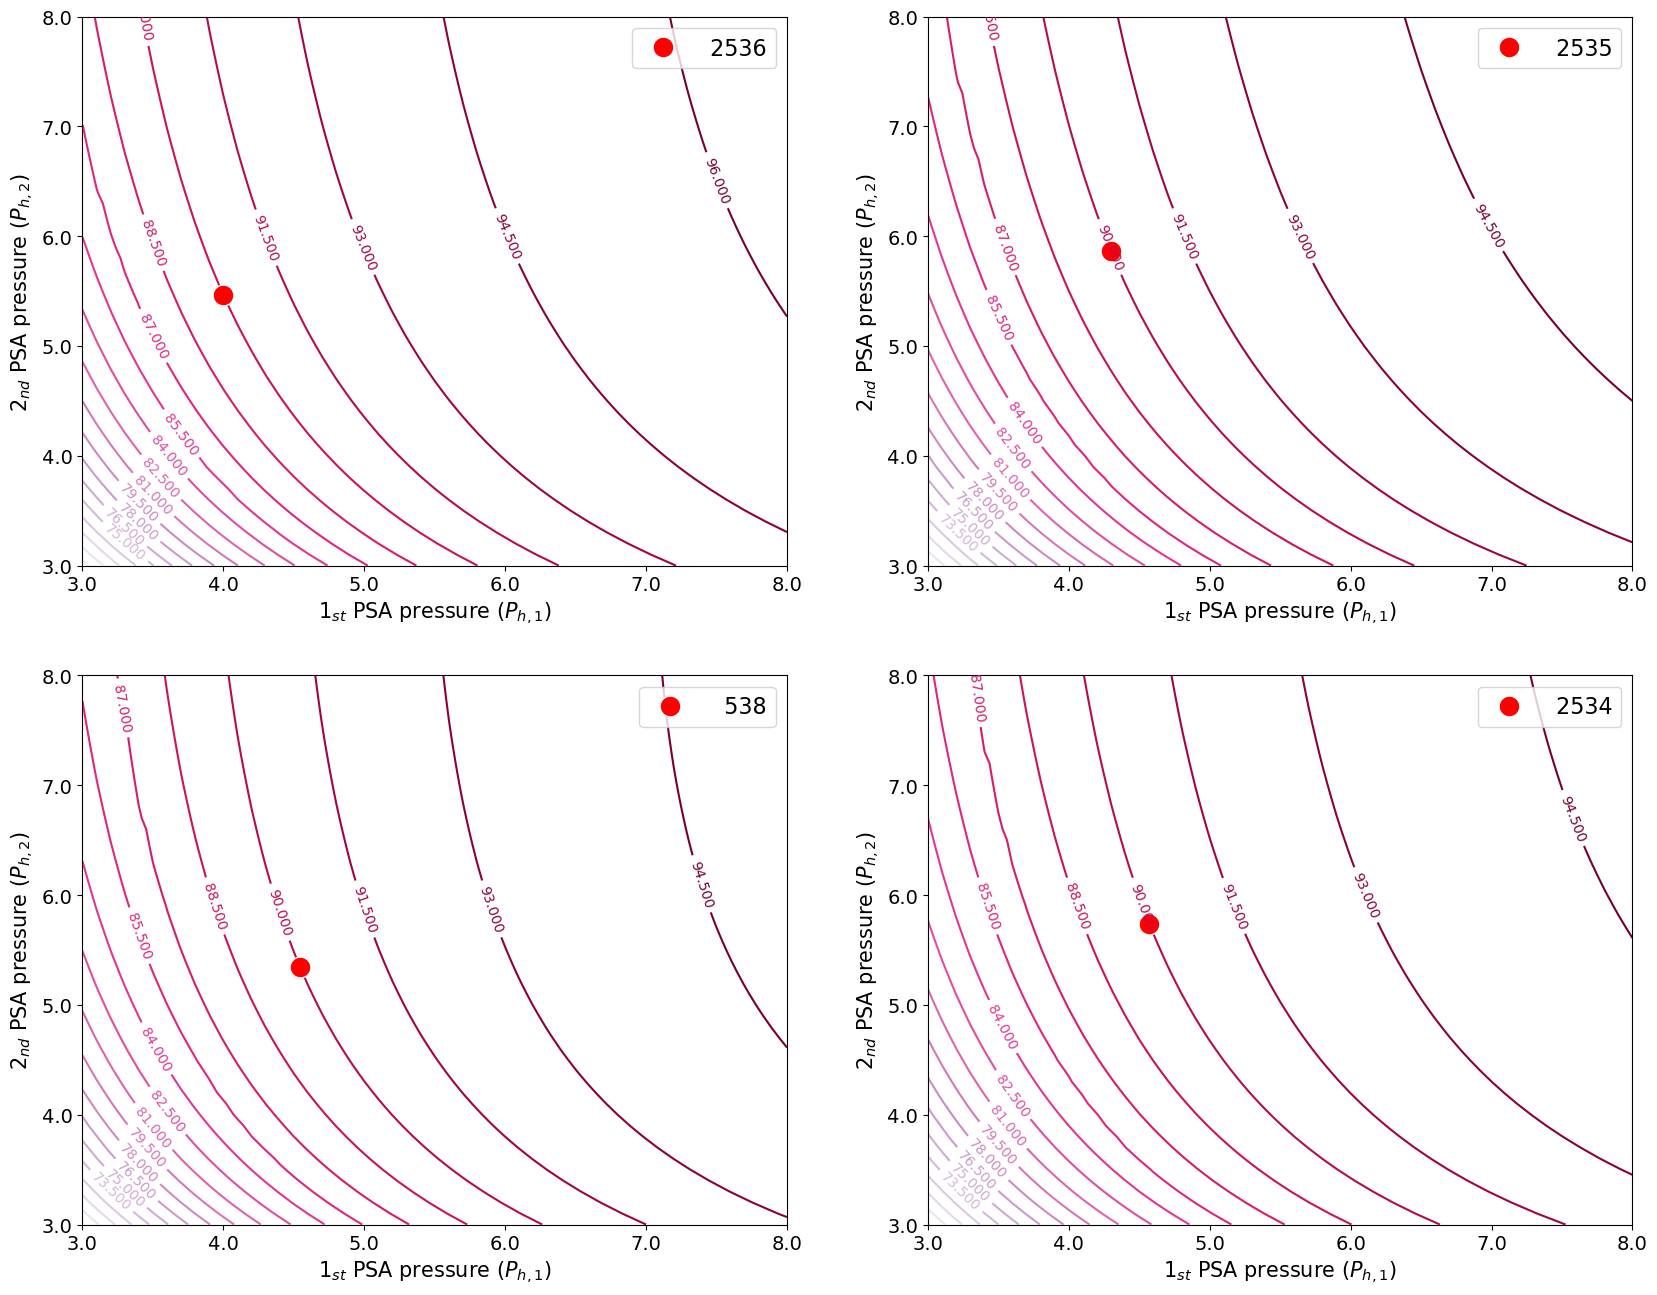

In [85]:
fig_all, ax_all = plt.subplots(N_row,N_column,
                               figsize = [20,16],
                               dpi = 100)
axx = 0
axy = 0
iiii = 0
for binnn,dHHH, Nameee in zip(bins_sort_e[:N_show],
                              dH_sort_e[:N_show],
                              Names_sort_e[:N_show]):
    x_bg_2D_list = []
    for ppp1 in P1_rang:
        x_bg_list_tmp = []
        for ppp2 in P2_rang:
            x_bg = consPSA2(ppp1,ppp2,Plow_tmp,Pfeed_tmp, binnn, dHHH,
                            Tref_tmp,yfeed_tmp,Tfeed_tmp)
            x_bg_list_tmp.append(x_bg[0])
        x_bg_2D_list.append(x_bg_list_tmp)
    
    x_bg_arr = np.array(x_bg_2D_list)
    
    ctr_tmp = ax_all[axx,axy].contour(P1_rang,P2_rang,x_bg_arr.T*100,
                                      levels = 25,cmap="PuRd")
    #ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
    #fig_all.colorbar(ctr_tmp,ax = ax_all[axx,axy])

    ax_all[axx,axy].clabel(ctr_tmp)
#    if iiii == 3:
#        ax_all[axx,axy].plot(4.8,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    elif iiii == 5:
#        ax_all[axx,axy].plot(4.95,P_opt_list[iiii][1], 'o',
#                             label = '{0:5d}'.format(Nameee),
#                             markersize = 15, markerfacecolor = 'r',
#                             markeredgecolor = [1,1,1])
#    else:
    ax_all[axx,axy].plot(Popt_sort_e[iiii][0],Popt_sort_e[iiii][1], 'o',
                         label = '{0:5d}'.format(Nameee),
                         markersize = 15, markerfacecolor = 'r',
                         markeredgecolor = [1,1,1])
    
    ax_all[axx,axy].legend(fontsize = 16)

    ax_all[axx,axy].set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
    ax_all[axx,axy].set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
    #ax_all[axx,axy].set_title('{0:6d}'.format(Nameee),fontsize = 20)
    xtt = ax_all[axx,axy].get_xticks()
    ytt = ax_all[axx,axy].get_xticks()
    ax_all[axx,axy].set_xticklabels(xtt,fontsize = 14)
    ax_all[axx,axy].set_yticklabels(ytt,fontsize = 14)
    iiii = iiii +1 
    axy = axy+1
    if axy >= N_row:
        axy = 0
        axx = axx+1
        
#fig_all.savefig('All_purity_w_opt.png')
fig_all.show()


## Scatter: Optimal pressure

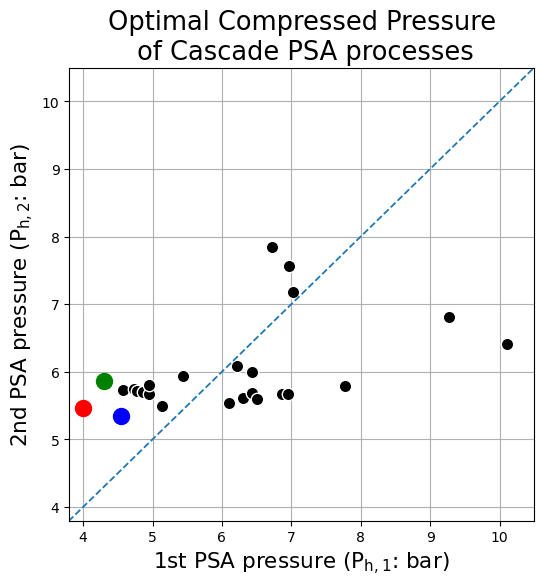

In [89]:
fig_scc,ax_scc=plt.subplots(figsize = [6,6],dpi = 100)
plt.grid()
ax_scc.set_axisbelow(True)
plt.scatter(Popt_sort_e[:,0],Popt_sort_e[:,1],color = 'k',s = 80,edgecolors = 'white')

plt.xlabel(r'1st PSA pressure (P$_{\rm h,1}$: bar)',fontsize = 15.5)
plt.ylabel(r'2nd PSA pressure (P$_{\rm h,2}$: bar)',fontsize = 15.5)
plt.plot(Popt_sort_e[0,0], Popt_sort_e[0,1],'ro',
         label  = 'Top ranked: {}'.format(Names_sort_e[0]), markersize = 11.5 )
plt.plot(Popt_sort_e[1,0], Popt_sort_e[1,1],'go',
         label = 'Second ranked: {}'.format(Names_sort_e[1]), markersize = 11.5)
plt.plot(Popt_sort_e[2,0], Popt_sort_e[2,1],'bo',
         label = 'Third ranked: {}'.format(Names_sort_e[2]), markersize = 11.5)

plt.xlim([3.8, 10.5])
plt.ylim([3.8, 10.5])
plt.title('Optimal Compressed Pressure\n of Cascade PSA processes',
         fontsize = 18.5)
#plt.legend(fontsize = 16,loc = 2,fancybox=True, framealpha=1)

xli = np.linspace(3,20)
yli = np.linspace(3,20)
plt.plot(xli,yli,'--',linewidth = 1.3)
plt.savefig('Cas_E_210705.png')

## Save Above data (Opt. Pressure)

In [56]:
#P_sav = np.reshape(Popt_sort_e,[-1,2])
Nam_sav= np.reshape(Names_sort_e,[-1,1])
Mat2save = np.concatenate((Nam_sav,Popt_sort_e),1)
pd.DataFrame(Mat2save).to_excel('SecNum_13_5_P_opt.xlsx')

# First PSA purity

In [57]:
x_PSA1 = []
for binnn,dHHH, Nameee, P1_optt in zip(bins_sort_e,
                                       dH_sort_e,
                                       Names_sort_e, Popt_sort_e[:,0]):
    #print(Nameee)
    rec_tmp,l_ind,x_tmp = rec(x_guess[0], P1_optt,1,
                              binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    x_PSA1.append(x_tmp[0])
    #print('=',x_tmp*100)
    print('{0:6d} : {1:8f}'.format(Nameee,x_tmp[0]*100))

    

  2536 : 34.226420
  2535 : 36.053517
   538 : 37.424352
  2534 : 37.730519
  2822 : 40.626328
  2332 : 44.041140
  2280 : 44.455524
  2279 : 44.662551
  2468 : 43.949754
  2419 : 42.627708


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


   385 : 45.175880
   386 : 45.528391
   491 : 44.961486
   388 : 46.277394
   490 : 46.490153
  2819 : 43.322344
   244 : 48.734084
  2147 : 47.928715
  2493 : 48.562821
  2820 : 46.036218
  1540 : 50.129024
  1689 : 48.518697
  2783 : 48.396454
   175 : 50.106152
   193 : 50.845696
  2753 : 49.455777
   387 : 50.931596
  1149 : 47.979495
  2305 : 48.973680
   918 : 52.237617
  2452 : 49.019162
    41 : 52.160784
  2528 : 51.365607
  2784 : 48.213460
  2709 : 50.964435
  2818 : 48.543932


# Optimization Example Graph

## Purifind:Purity 90% calculation

In [58]:
def Purifind(Ph1,Ph2_0,iso_input,dH_input,x_ini_1,x_ini_2):
    def Puri_err(Ph2):
        E_tmp,x_tmp = PSA2(Ph1,Ph2,1,1,
                           iso_input,dH_input,
                           [298,298],[0.1,0.9], 313.15,
                           x_ini_1,x_ini_2)
        return (x_tmp - 0.9)**2
    sol = optim.least_squares(Puri_err,Ph2_0)
    return sol.x

## Computing the Energy and purity

In [59]:
from scipy.interpolate import interp1d

In [60]:
ind_exx =  5
bin_exx = bins_sort_e[ind_exx]
dH_exx = dH_sort_e[ind_exx]
Name_exx = Names_sort_e[ind_exx]
print('Name: ', Name_exx)

P_ran_1 = np.linspace(2.875,10,7*8+2)
P_ran_2 = np.linspace(2.875,10,7*8+2)
P_low_interm = 1
T_tri2 = [298,298]
P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 313

E_ex_2d =[]
x_90_line = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_exx,dH_exx,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_exx,dH_dH_exx,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_exx,dH_exx,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    arg_xxx_90 = np.argmin((np.array(xxx_list)- 0.9)**2)
    try:
        f_inter = interp1d(xxx_list,
                           P_ran_2)
        p90_tmp = f_inter(0.9)
    except:
        if p1 < 7:
            p90_tmp = P_ran_2[-1]*1.1        
        else:
            p90_tmp = P_ran_2[0]*0.9        
    #pp2_0 = P_ran_2[arg_xxx_90]
    #p90_tmp = Purifind(p1,pp2_0,bin_exx,dH_exx,xg1,xg2)       
    E_ex_2d.append(EEE_list)
    x_90_line.append(p90_tmp)



Name:  2332
2.875 2.875
2.875 3.0
2.875 3.125
2.875 3.25
2.875 3.375
2.875 3.5
2.875 3.625
2.875 3.75
2.875 3.875
2.875 4.0
2.875 4.125
2.875 4.25
2.875 4.375
2.875 4.5
2.875 4.625
2.875 4.75
2.875 4.875
2.875 5.0
2.875 5.125
2.875 5.25
2.875 5.375
2.875 5.5
2.875 5.625
2.875 5.75
2.875 5.875
2.875 6.0
2.875 6.125
2.875 6.25
2.875 6.375
2.875 6.5
2.875 6.625
2.875 6.75
2.875 6.875
2.875 7.0
2.875 7.125
2.875 7.25
2.875 7.375
2.875 7.5
2.875 7.625
2.875 7.75
2.875 7.875
2.875 8.0
2.875 8.125
2.875 8.25
2.875 8.375
2.875 8.5
2.875 8.625
2.875 8.75
2.875 8.875
2.875 9.0
2.875 9.125
2.875 9.25
2.875 9.375
2.875 9.5
2.875 9.625
2.875 9.75
2.875 9.875
2.875 10.0
3.0 2.875
3.0 3.0
3.0 3.125
3.0 3.25
3.0 3.375
3.0 3.5
3.0 3.625
3.0 3.75
3.0 3.875
3.0 4.0
3.0 4.125
3.0 4.25
3.0 4.375
3.0 4.5
3.0 4.625
3.0 4.75
3.0 4.875
3.0 5.0
3.0 5.125
3.0 5.25
3.0 5.375
3.0 5.5
3.0 5.625
3.0 5.75
3.0 5.875
3.0 6.0
3.0 6.125
3.0 6.25
3.0 6.375
3.0 6.5
3.0 6.625
3.0 6.75
3.0 6.875
3.0 7.0
3.0 7.125
3.0 7.25
3.

6.125 9.5
6.125 9.625
6.125 9.75
6.125 9.875
6.125 10.0
6.25 2.875
6.25 3.0
6.25 3.125
6.25 3.25
6.25 3.375
6.25 3.5
6.25 3.625
6.25 3.75
6.25 3.875
6.25 4.0
6.25 4.125
6.25 4.25
6.25 4.375
6.25 4.5
6.25 4.625
6.25 4.75
6.25 4.875
6.25 5.0
6.25 5.125
6.25 5.25
6.25 5.375
6.25 5.5
6.25 5.625
6.25 5.75
6.25 5.875
6.25 6.0
6.25 6.125
6.25 6.25
6.25 6.375
6.25 6.5
6.25 6.625
6.25 6.75
6.25 6.875
6.25 7.0
6.25 7.125
6.25 7.25
6.25 7.375
6.25 7.5
6.25 7.625
6.25 7.75
6.25 7.875
6.25 8.0
6.25 8.125
6.25 8.25
6.25 8.375
6.25 8.5
6.25 8.625
6.25 8.75
6.25 8.875
6.25 9.0
6.25 9.125
6.25 9.25
6.25 9.375
6.25 9.5
6.25 9.625
6.25 9.75
6.25 9.875
6.25 10.0
6.375 2.875
6.375 3.0
6.375 3.125
6.375 3.25
6.375 3.375
6.375 3.5
6.375 3.625
6.375 3.75
6.375 3.875
6.375 4.0
6.375 4.125
6.375 4.25
6.375 4.375
6.375 4.5
6.375 4.625
6.375 4.75
6.375 4.875
6.375 5.0
6.375 5.125
6.375 5.25
6.375 5.375
6.375 5.5
6.375 5.625
6.375 5.75
6.375 5.875
6.375 6.0
6.375 6.125
6.375 6.25
6.375 6.375
6.375 6.5
6.375 6.625


7.875 5.625
7.875 5.75
7.875 5.875
7.875 6.0
7.875 6.125
7.875 6.25
7.875 6.375
7.875 6.5
7.875 6.625
7.875 6.75
7.875 6.875
7.875 7.0
7.875 7.125
7.875 7.25
7.875 7.375
7.875 7.5
7.875 7.625
7.875 7.75
7.875 7.875
7.875 8.0
7.875 8.125
7.875 8.25
7.875 8.375
7.875 8.5
7.875 8.625
7.875 8.75
7.875 8.875
7.875 9.0
7.875 9.125
7.875 9.25
7.875 9.375
7.875 9.5
7.875 9.625
7.875 9.75
7.875 9.875
7.875 10.0
8.0 2.875
8.0 3.0
8.0 3.125
8.0 3.25
8.0 3.375
8.0 3.5
8.0 3.625
8.0 3.75
8.0 3.875
8.0 4.0
8.0 4.125
8.0 4.25
8.0 4.375
8.0 4.5
8.0 4.625
8.0 4.75
8.0 4.875
8.0 5.0
8.0 5.125
8.0 5.25
8.0 5.375
8.0 5.5
8.0 5.625
8.0 5.75
8.0 5.875
8.0 6.0
8.0 6.125
8.0 6.25
8.0 6.375
8.0 6.5
8.0 6.625
8.0 6.75
8.0 6.875
8.0 7.0
8.0 7.125
8.0 7.25
8.0 7.375
8.0 7.5
8.0 7.625
8.0 7.75
8.0 7.875
8.0 8.0
8.0 8.125
8.0 8.25
8.0 8.375
8.0 8.5
8.0 8.625
8.0 8.75
8.0 8.875
8.0 9.0
8.0 9.125
8.0 9.25
8.0 9.375
8.0 9.5
8.0 9.625
8.0 9.75
8.0 9.875
8.0 10.0
8.125 2.875
8.125 3.0
8.125 3.125
8.125 3.25
8.125 3.375


9.5 9.75
9.5 9.875
9.5 10.0
9.625 2.875
9.625 3.0
9.625 3.125
9.625 3.25
9.625 3.375
9.625 3.5
9.625 3.625
9.625 3.75
9.625 3.875
9.625 4.0
9.625 4.125
9.625 4.25
9.625 4.375
9.625 4.5
9.625 4.625
9.625 4.75
9.625 4.875
9.625 5.0
9.625 5.125
9.625 5.25
9.625 5.375
9.625 5.5
9.625 5.625
9.625 5.75
9.625 5.875
9.625 6.0
9.625 6.125
9.625 6.25
9.625 6.375
9.625 6.5
9.625 6.625
9.625 6.75
9.625 6.875
9.625 7.0
9.625 7.125
9.625 7.25
9.625 7.375
9.625 7.5
9.625 7.625
9.625 7.75
9.625 7.875
9.625 8.0
9.625 8.125
9.625 8.25
9.625 8.375
9.625 8.5
9.625 8.625
9.625 8.75
9.625 8.875
9.625 9.0
9.625 9.125
9.625 9.25
9.625 9.375
9.625 9.5
9.625 9.625
9.625 9.75
9.625 9.875
9.625 10.0
9.75 2.875
9.75 3.0
9.75 3.125
9.75 3.25
9.75 3.375
9.75 3.5
9.75 3.625
9.75 3.75
9.75 3.875
9.75 4.0
9.75 4.125
9.75 4.25
9.75 4.375
9.75 4.5
9.75 4.625
9.75 4.75
9.75 4.875
9.75 5.0
9.75 5.125
9.75 5.25
9.75 5.375
9.75 5.5
9.75 5.625
9.75 5.75
9.75 5.875
9.75 6.0
9.75 6.125
9.75 6.25
9.75 6.375
9.75 6.5
9.75 6.625
9

In [61]:
print('Name: ', Name_exx)

Name:  2332


In [66]:
ind_exx00 = 0
Popt_sort_e[ind_exx00]

array([3.99998708, 5.46392078])

In [67]:
ind_exx =  0
#ind_exx =  10
bin_exx = bins_sort_e[ind_exx]
dH_exx = dH_sort_e[ind_exx]
Name_exx = Names_sort_e[ind_exx]
print('Name: ', Name_exx)

P_ran_1 = np.linspace(2.875,10,7*8+2)
P_ran_2 = np.linspace(2.875,10,7*8+2)
P_low_interm = 1
T_tri2 = [298,298]
P_feed2 = 1
y_feed2 = [0.1, 0.9]
T_feed2 = 313

E_ex_2d =[]
x_ex_2d = []
x_90_line = []

for p1 in P_ran_1:
    EEE_list = []
    xxx_list = []
    for p2 in P_ran_2:
        try:
            xg1 = 0.3
            xg2 = 0.7
            E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                               bin_exx,dH_exx,T_tri2,
                               y_feed2,T_feed2,xg1,xg2)
        except:
            try:
                xg1 = 0.4
                xg2 = 0.75
                E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                   bin_exx,dH_dH_exx,T_tri2,
                                   y_feed2,T_feed2,xg1,xg2)
            except:
                try:
                    xg1 = 0.4
                    xg2 = 0.85
                    E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                       bin_exx,dH_exx,T_tri2,
                                       y_feed2,T_feed2,xg1,xg2)
                except:
                    try:
                        xg1 = 0.7
                        xg2 = 0.90
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)
                    except:
                        xg1 = 0.8
                        xg2 = 0.98
                        E_tmp, x_tmp =PSA2(p1,p2,P_low_interm,P_feed2,
                                           bin_exx,dH_exx,T_tri2,
                                           y_feed2,T_feed2,xg1,xg2)

        EEE_list.append(E_tmp[0])
        xxx_list.append(x_tmp[0])
        print(p1,p2)
    arg_xxx_90 = np.argmin((np.array(xxx_list)- 0.9)**2)
    try:
        f_inter = interp1d(xxx_list,
                           P_ran_2)
        p90_tmp = f_inter(0.9)
    except:
        if p1 < 7:
            p90_tmp = P_ran_2[-1]*1.1        
        else:
            p90_tmp = P_ran_2[0]*0.9        
    #pp2_0 = P_ran_2[arg_xxx_90]
    #p90_tmp = Purifind(p1,pp2_0,bin_exx,dH_exx,xg1,xg2)       
    E_ex_2d.append(EEE_list)
    x_ex_2d.append(xxx_list)
    x_90_line.append(p90_tmp)

Name:  2536
2.875 2.875
2.875 3.0
2.875 3.125
2.875 3.25
2.875 3.375
2.875 3.5
2.875 3.625
2.875 3.75
2.875 3.875
2.875 4.0
2.875 4.125
2.875 4.25
2.875 4.375
2.875 4.5
2.875 4.625
2.875 4.75
2.875 4.875
2.875 5.0
2.875 5.125
2.875 5.25
2.875 5.375
2.875 5.5
2.875 5.625
2.875 5.75
2.875 5.875
2.875 6.0
2.875 6.125
2.875 6.25
2.875 6.375
2.875 6.5
2.875 6.625
2.875 6.75
2.875 6.875
2.875 7.0
2.875 7.125
2.875 7.25
2.875 7.375
2.875 7.5
2.875 7.625
2.875 7.75
2.875 7.875
2.875 8.0
2.875 8.125
2.875 8.25
2.875 8.375
2.875 8.5
2.875 8.625
2.875 8.75
2.875 8.875
2.875 9.0
2.875 9.125
2.875 9.25
2.875 9.375
2.875 9.5
2.875 9.625
2.875 9.75
2.875 9.875
2.875 10.0
3.0 2.875
3.0 3.0
3.0 3.125
3.0 3.25
3.0 3.375
3.0 3.5
3.0 3.625
3.0 3.75
3.0 3.875
3.0 4.0
3.0 4.125
3.0 4.25
3.0 4.375
3.0 4.5
3.0 4.625
3.0 4.75
3.0 4.875
3.0 5.0
3.0 5.125
3.0 5.25
3.0 5.375
3.0 5.5
3.0 5.625
3.0 5.75
3.0 5.875
3.0 6.0
3.0 6.125
3.0 6.25
3.0 6.375
3.0 6.5
3.0 6.625
3.0 6.75
3.0 6.875
3.0 7.0
3.0 7.125
3.0 7.25
3.

4.5 6.125
4.5 6.25
4.5 6.375
4.5 6.5
4.5 6.625
4.5 6.75
4.5 6.875
4.5 7.0
4.5 7.125
4.5 7.25
4.5 7.375
4.5 7.5
4.5 7.625
4.5 7.75
4.5 7.875
4.5 8.0
4.5 8.125
4.5 8.25
4.5 8.375
4.5 8.5
4.5 8.625
4.5 8.75
4.5 8.875
4.5 9.0
4.5 9.125
4.5 9.25
4.5 9.375
4.5 9.5
4.5 9.625
4.5 9.75
4.5 9.875
4.5 10.0
4.625 2.875
4.625 3.0
4.625 3.125
4.625 3.25
4.625 3.375
4.625 3.5
4.625 3.625
4.625 3.75
4.625 3.875
4.625 4.0
4.625 4.125
4.625 4.25
4.625 4.375
4.625 4.5
4.625 4.625
4.625 4.75
4.625 4.875
4.625 5.0
4.625 5.125
4.625 5.25
4.625 5.375
4.625 5.5
4.625 5.625
4.625 5.75
4.625 5.875
4.625 6.0
4.625 6.125
4.625 6.25
4.625 6.375
4.625 6.5
4.625 6.625
4.625 6.75
4.625 6.875
4.625 7.0
4.625 7.125
4.625 7.25
4.625 7.375
4.625 7.5
4.625 7.625
4.625 7.75
4.625 7.875
4.625 8.0
4.625 8.125
4.625 8.25
4.625 8.375
4.625 8.5
4.625 8.625
4.625 8.75
4.625 8.875
4.625 9.0
4.625 9.125
4.625 9.25
4.625 9.375
4.625 9.5
4.625 9.625
4.625 9.75
4.625 9.875
4.625 10.0
4.75 2.875
4.75 3.0
4.75 3.125
4.75 3.25
4.75 3.37

C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


5.5 10.0
5.625 2.875
5.625 3.0
5.625 3.125
5.625 3.25
5.625 3.375
5.625 3.5
5.625 3.625
5.625 3.75
5.625 3.875
5.625 4.0
5.625 4.125
5.625 4.25
5.625 4.375
5.625 4.5
5.625 4.625
5.625 4.75
5.625 4.875
5.625 5.0
5.625 5.125
5.625 5.25
5.625 5.375
5.625 5.5
5.625 5.625
5.625 5.75
5.625 5.875
5.625 6.0
5.625 6.125
5.625 6.25
5.625 6.375
5.625 6.5
5.625 6.625
5.625 6.75
5.625 6.875
5.625 7.0
5.625 7.125
5.625 7.25
5.625 7.375
5.625 7.5
5.625 7.625
5.625 7.75
5.625 7.875
5.625 8.0
5.625 8.125
5.625 8.25
5.625 8.375
5.625 8.5
5.625 8.625
5.625 8.75
5.625 8.875
5.625 9.0
5.625 9.125
5.625 9.25
5.625 9.375
5.625 9.5
5.625 9.625
5.625 9.75
5.625 9.875
5.625 10.0
5.75 2.875
5.75 3.0
5.75 3.125
5.75 3.25
5.75 3.375
5.75 3.5
5.75 3.625
5.75 3.75
5.75 3.875
5.75 4.0
5.75 4.125
5.75 4.25
5.75 4.375
5.75 4.5
5.75 4.625
5.75 4.75
5.75 4.875
5.75 5.0
5.75 5.125
5.75 5.25
5.75 5.375
5.75 5.5
5.75 5.625
5.75 5.75
5.75 5.875
5.75 6.0
5.75 6.125
5.75 6.25
5.75 6.375
5.75 6.5
5.75 6.625
5.75 6.75
5.75 6.875

7.25 6.125
7.25 6.25
7.25 6.375
7.25 6.5
7.25 6.625
7.25 6.75
7.25 6.875
7.25 7.0
7.25 7.125
7.25 7.25
7.25 7.375
7.25 7.5
7.25 7.625
7.25 7.75
7.25 7.875
7.25 8.0
7.25 8.125
7.25 8.25
7.25 8.375
7.25 8.5
7.25 8.625
7.25 8.75
7.25 8.875
7.25 9.0
7.25 9.125
7.25 9.25
7.25 9.375
7.25 9.5
7.25 9.625
7.25 9.75
7.25 9.875
7.25 10.0
7.375 2.875
7.375 3.0
7.375 3.125
7.375 3.25
7.375 3.375
7.375 3.5
7.375 3.625
7.375 3.75
7.375 3.875
7.375 4.0
7.375 4.125
7.375 4.25
7.375 4.375
7.375 4.5
7.375 4.625
7.375 4.75
7.375 4.875
7.375 5.0
7.375 5.125
7.375 5.25
7.375 5.375
7.375 5.5
7.375 5.625
7.375 5.75
7.375 5.875
7.375 6.0
7.375 6.125
7.375 6.25
7.375 6.375
7.375 6.5
7.375 6.625
7.375 6.75
7.375 6.875
7.375 7.0
7.375 7.125
7.375 7.25
7.375 7.375
7.375 7.5
7.375 7.625
7.375 7.75
7.375 7.875
7.375 8.0
7.375 8.125
7.375 8.25
7.375 8.375
7.375 8.5
7.375 8.625
7.375 8.75
7.375 8.875
7.375 9.0
7.375 9.125
7.375 9.25
7.375 9.375
7.375 9.5
7.375 9.625
7.375 9.75
7.375 9.875
7.375 10.0
7.5 2.875
7.5 3.0


8.875 9.0
8.875 9.125
8.875 9.25
8.875 9.375
8.875 9.5
8.875 9.625
8.875 9.75
8.875 9.875
8.875 10.0
9.0 2.875
9.0 3.0
9.0 3.125
9.0 3.25
9.0 3.375
9.0 3.5
9.0 3.625
9.0 3.75
9.0 3.875
9.0 4.0
9.0 4.125
9.0 4.25
9.0 4.375
9.0 4.5
9.0 4.625
9.0 4.75
9.0 4.875
9.0 5.0
9.0 5.125
9.0 5.25
9.0 5.375
9.0 5.5
9.0 5.625
9.0 5.75
9.0 5.875
9.0 6.0
9.0 6.125
9.0 6.25
9.0 6.375
9.0 6.5
9.0 6.625
9.0 6.75
9.0 6.875
9.0 7.0
9.0 7.125
9.0 7.25
9.0 7.375
9.0 7.5
9.0 7.625
9.0 7.75
9.0 7.875
9.0 8.0
9.0 8.125
9.0 8.25
9.0 8.375
9.0 8.5
9.0 8.625
9.0 8.75
9.0 8.875
9.0 9.0
9.0 9.125
9.0 9.25
9.0 9.375
9.0 9.5
9.0 9.625
9.0 9.75
9.0 9.875
9.0 10.0
9.125 2.875
9.125 3.0
9.125 3.125
9.125 3.25
9.125 3.375
9.125 3.5
9.125 3.625
9.125 3.75
9.125 3.875
9.125 4.0
9.125 4.125
9.125 4.25
9.125 4.375
9.125 4.5
9.125 4.625
9.125 4.75
9.125 4.875
9.125 5.0
9.125 5.125
9.125 5.25
9.125 5.375
9.125 5.5
9.125 5.625
9.125 5.75
9.125 5.875
9.125 6.0
9.125 6.125
9.125 6.25
9.125 6.375
9.125 6.5
9.125 6.625
9.125 6.75
9.

In [74]:
for i in range(26,33):
    x_90_line[i] = 2.5

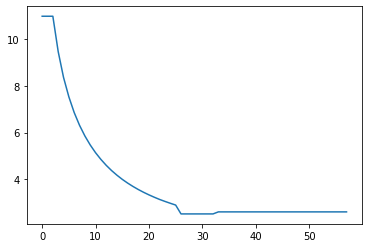

In [75]:
plt.plot(x_90_line)

(3.0, 10.0)

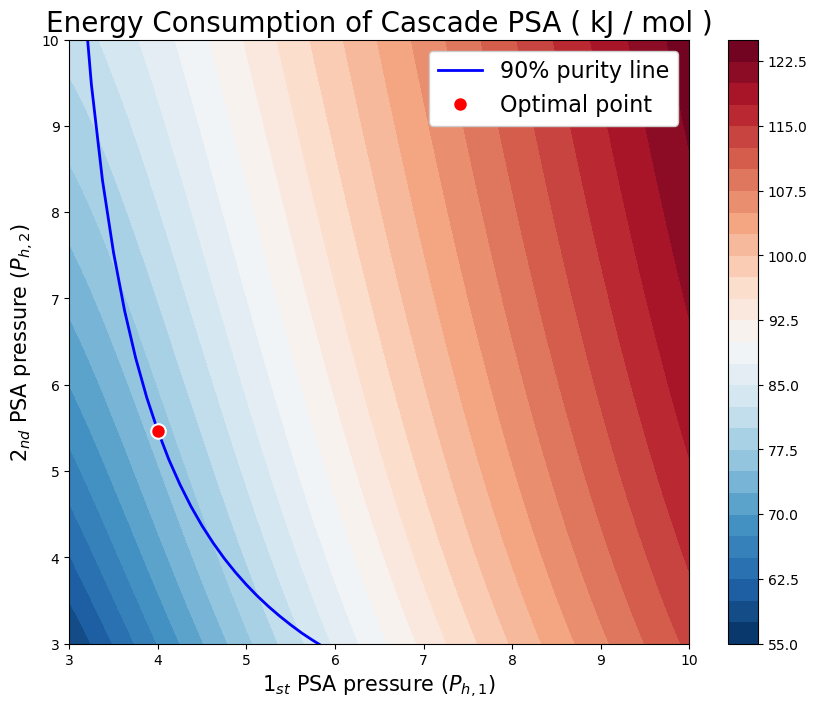

In [76]:


## INTO Array
E_per_n_arr = np.array(E_per_n_2d)
x_prod_arr = np.array(x_prod_2d)

## Graph
fig1,ax1 = plt.subplots(figsize = [10,8],dpi = 100)
ctr1 = ax1.contourf(P_ran_1,P_ran_2,np.array(E_ex_2d).T/1000,levels = 30,cmap="RdBu_r")
ax1.plot(P_ran_1,x_90_line,'b-',linewidth = 2, label = '90% purity line')
ax1.plot(Popt_sort_e[ind_exx][0], Popt_sort_e[ind_exx][1], 'o',
         markerfacecolor = 'r',markeredgecolor = 'white',markeredgewidth = 1.5,
         markersize = 10.5,label='Optimal point' )

fig1.colorbar(ctr1,ax=ax1)
plt.legend(fontsize = 16,loc = 0,fancybox=True, framealpha=1)

#ax1.plot(p1_sort, p2_sort,'b-.',lw = 2.8 )
#ax1.text(6.5,7.4,'Recovery = 70%',
#         fontdict = {'size':12,'color': 'blue','weight':'bold'})
ax1.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 15)
ax1.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 15)
ax1.set_title('Energy Consumption of Cascade PSA ( kJ / mol )',fontsize = 20)

## x and y axis
ax1.set_xlim(3,10)
ax1.set_ylim(3,10)
#ax1.set_xticks([5,6,7,8,9,10,11,12])
#ax1.set_yticks([5,6,7,8,9,10,11,12])
#fig1.show()

#fig1.savefig('E_cas_PSA.png')



#plt.contour(P_ran_1,P_ran_2,np.array(E_ex_2d))


## 2D Graph: purity contours

(3.0, 10.0)

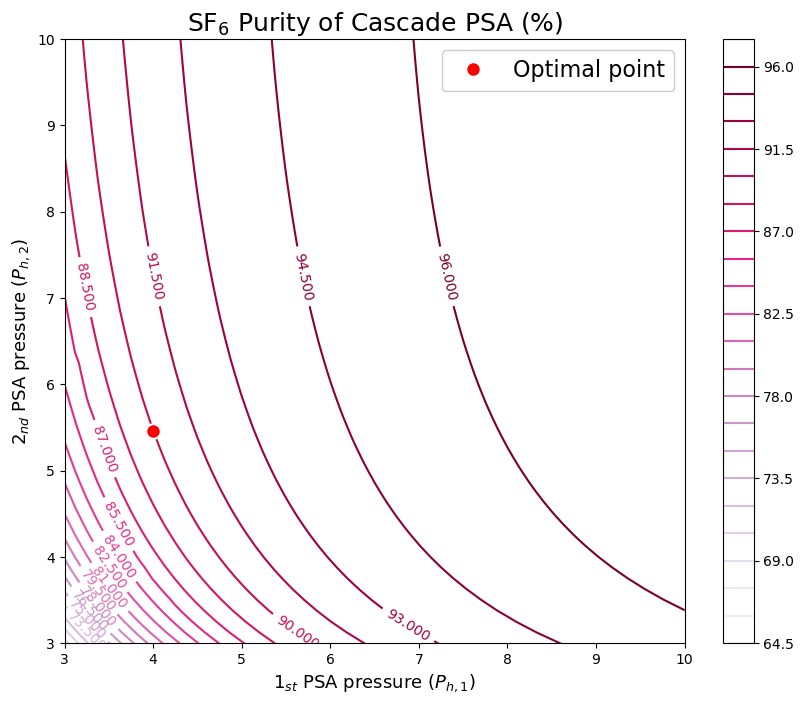

In [77]:
### INTO Array ###
#x_prod_arr = np.array(x_ex_2d)
fig2,ax2 = plt.subplots(figsize = [10,8],dpi = 100)
ctr2 = ax2.contour(P_ran_1,P_ran_2,np.array(x_ex_2d).T*100,levels = 25,cmap="PuRd")

#ax2.plot(P_ran_1,x_90_line,'b-',linewidth = 2, label = '90% purity line')
ax2.plot(Popt_sort_e[ind_exx][0], Popt_sort_e[ind_exx][1], 'o',
         markerfacecolor = 'r',markeredgecolor = 'white',markeredgewidth = 1.5,
         markersize = 10.5,label='Optimal point' )

plt.legend(fontsize = 16,loc = 0,fancybox=True, framealpha=1)
#ctr2 = ax2.contour(Ph1_arr,Ph2_arr,Rec_res_arr,levels = 25,colors= 'k')
fig2.colorbar(ctr2,ax = ax2)

ax2.clabel(ctr2)

ax2.set_xlabel('$1_{st}$ PSA pressure ($P_{h,1}$)',fontsize = 13)
ax2.set_ylabel('$2_{nd}$ PSA pressure ($P_{h,2}$)',fontsize = 13)
ax2.set_title('SF$_6$ Purity of Cascade PSA (%)',fontsize = 18)
## x and y axis
ax2.set_xlim(3,10)
ax2.set_ylim(3,10)
#ax2.set_xticks([5,6,7,8,9,10,11,12])
#ax2.set_yticks([5,6,7,8,9,10,11,12])  
#fig2.show()

#fig2.savefig('Purity_cas_PSA.png')

# Purities After 1st and 2nd PSA Trains in Cascade System

## 1st PSA purity

In [74]:
xx_PSA1 = []
for binnn,dHHH, Nameee,popt in zip(bins_sort_e,
                                   dH_sort_e,
                                   Names_sort_e, Popt_sort_e):
    xini_tmpp = 0.3
    try:
        rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,
                                  binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    except:
        try:
            xini_tmpp = 0.5
            rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,binnn, dHHH, T_tri,y_feed_in, T_feed_in)
        except:
            xini_tmpp = 0.8
            rec_tmp,l_ind,x_tmp = rec(xini_tmpp, popt[0],1,binnn, dHHH, T_tri,y_feed_in, T_feed_in)
    xx_PSA1.append(x_tmp[0])


C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:354: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["Ka"] * pressure
C:\ProgramData\Anaconda3\lib\site-packages\pyiast\isotherms.py:351: RuntimeWarning: invalid value encountered in log
  return self.params["M"] * np.log(1.0 + self.params["K"] * pressure)


## Bar graph: Purities after 1st and 2nd PSA

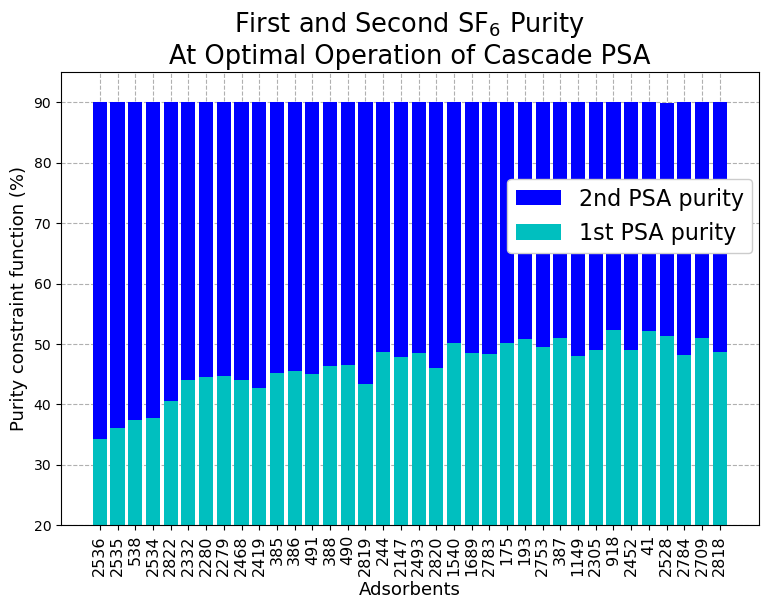

In [110]:
xx_sort_E = np.reshape(np.array(xx_opt_list)[arg_sort_e],-1)

fig_pu,ax_pu=plt.subplots(figsize = [9,6],dpi = 100)
ax_pu.set_axisbelow(True)
plt.grid(which = 'major', linestyle = '--')

plt.bar(np.arange(len(xx_sort_E)),xx_sort_E,
        color= 'b',label = '2nd PSA purity')
plt.bar(np.arange(len(xx_PSA1)),np.array(xx_PSA1)*100,
        color= 'c',label = '1st PSA purity')
plt.xticks(np.arange(len(xx_sort_E)),
          labels = Names_sort_e,fontsize = 11.5,
           rotation = 90)
plt.ylim([20,95])
plt.ylabel('Purity constraint function (%)',fontsize = 13)
plt.xlabel('Adsorbents',fontsize = 13)
plt.title('First and Second SF$_6$ Purity \nAt Optimal Operation of Cascade PSA',fontsize = 18.5)
plt.legend(fontsize = 16,loc = [0.64,0.6],fancybox=True, framealpha=1)